# 2020 WORLD HAPPINESS ANALYSIS

## Introduction

Happiness is very subjective, however, it doesn't hurt to try to analze it! The data is collected from Nations and collected from: https://www.kaggle.com/mathurinache/world-happiness-report

The information is gathered through a randomized Cantril ladder survery, and considersm six important factors: Social Support (previously family), GDP (economy), Healthy Life Expectancy, Freedom, Preception of Corruption and Generosity. There is an additional factor: Dystopia + Residual where Dystopia is the world's unhappiest country (there is no country worse than this "dystopian" country) and Residual is the unexplained happiness. 

Some factors such as GDP and Healthy Life Expectancy are fixed numbers, where as the others are answered by the participants 

## Purpose

The notebook hopes to answer the following questions:
* Which Countries are the happiest?
* Which Continents are the happiest?
* What is the relationship between the six factors and happiness?
* Which factors influence happiness the most?
* How alike are each of the continents, are their notable differences between then?

In the future, I hope to expand this notebook to incoperate the following:
* Can we build a prediction model for the Happiness for 2020? 
* How did happiness change over the last 5 years? 
* How much did the influence of each of these factors change over time?

## Contents

###  1. [ Set Up](#set_up)

### 2 . [Overview of World Happiness](#overall)

### 3. [Overview of Six Contributing Factors](#overall)
* ### [GDP/Economy](#overall)
* ### [Social Support](#overall)
* ### [Freedom](#overall) 
* ### [Healthy Life Expectancy](#overall) 
* ### [Preception of Corruption](#overall) 
* ### [Generosity](#overall)

### 4. [Overiew of Happiness By Continent](../blob/master/LICENSE)
* ### [Overiew of North America](../blob/master/LICENSE)
* ### [Overiew of Europe](../blob/master/LICENSE)
* ### [Overiew of Asia](../blob/master/LICENSE)
* ### [Overiew of Africa](../blob/master/LICENSE)
* ### [Overiew of North America](../blob/master/LICENSE)





<a id='set_up'></a>
### SET UP

In this section all nessecary libraries are imported, the relevant data is loaded and adjusted as needed. Specifically the original CSV file is altered as:
* A new column continent is added
* Another column with the three letter ISO code is added as this is needed to map the countries
* The missing ISO codes are filled
* The columns are renamed for easier manipulation

In [1]:
#IMPORT ALL LIBRARIES
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default='notebook'
import geopandas as gpd
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import requests
sns.set_theme(style="darkgrid")


In [2]:
#LOAD DATA
twenty_twenty_data = pd.read_csv("./2020.csv")
twenty_twenty_data.head()
twenty_twenty_data= twenty_twenty_data.rename(columns={"Country name":"country","Ladder score":"ladder_score","Regional indicator":"regional_indicator","Social support":"social_support","Healthy life expectancy":"healthy_life_expectancy","Freedom to make life choices":"freedom","Perceptions of corruption":"perception_of_corruption","Logged GDP per capita":"GDP" })
twenty_twenty_data.country.replace("Taiwan Province of China","Taiwan",inplace=True)
world_codes = pd.read_csv("https://raw.githubusercontent.com/datasets/country-codes/master/data/country-codes.csv")
world_codes= world_codes.loc[:,["official_name_en","ISO3166-1-Alpha-3"]].copy()  #Get ISO code

In [3]:
#map code to country
continents = {
    'EU':'Europe',
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Oceania',
    'AF': 'Africa',
}
def add_continet(row):
    try:
       
        code =country_name_to_country_alpha2(row.country, cn_name_format="default")
        return continents[country_alpha2_to_continent_code(code)]
    except:
        print(row.country)
        return row.regional_indicator.split(" ")[-1]
        
twenty_twenty_data['continent']=twenty_twenty_data.apply(add_continet,axis=1) # add continent column

Kosovo
North Cyprus
Hong Kong S.A.R. of China
Congo (Brazzaville)
Palestinian Territories
Congo (Kinshasa)


In [4]:
#join the ISO code column to dataFrame
twenty_twenty_data= twenty_twenty_data.join(world_codes.set_index('official_name_en'), on='country')
twenty_twenty_data.rename(columns={"ISO3166-1-Alpha-3":"code"},inplace=True)
twenty_twenty_data

country  regional_indicator  ladder_score  \
0                     Finland      Western Europe        7.8087   
1                     Denmark      Western Europe        7.6456   
2                 Switzerland      Western Europe        7.5599   
3                     Iceland      Western Europe        7.5045   
4                      Norway      Western Europe        7.4880   
..                        ...                 ...           ...   
148  Central African Republic  Sub-Saharan Africa        3.4759   
149                    Rwanda  Sub-Saharan Africa        3.3123   
150                  Zimbabwe  Sub-Saharan Africa        3.2992   
151               South Sudan  Sub-Saharan Africa        2.8166   
152               Afghanistan          South Asia        2.5669   

     Standard error of ladder score  upperwhisker  lowerwhisker        GDP  \
0                          0.031156      7.869766      7.747634  10.639267   
1                          0.033492      7.711245      7.579955  10.774001   
2                          0.035014      7.628528      7.491272  10.979933   
3                          0.059616      7.621347      7.387653  10.772559   
4                          0.034837      7.556281      7.419719  11.087804   
..                              ...           ...           ...        ...   
148                        0.115183      3.701658      3.250141   6.625160   
149                        0.052425      3.415053      3.209547   7.600104   
150                        0.058674      3.414202      3.184198   7.865712   
151                        0.107610      3.027516      2.605684   7.425360   
152                        0.031311      2.628270      2.505530   7.462861   

     social_support  healthy_life_expectancy   freedom  ...  \
0          0.954330                71.900825  0.949172  ...   
1          0.955991                72.402504  0.951444  ...   
2          0.942847                74.102448  0.921337  ...   
3          0.974670                73.000000  0.948892  ...   
4          0.952487                73.200783  0.955750  ...   
..              ...                      ...       ...  ...   
148        0.319460                45.200001  0.640881  ...   
149        0.540835                61.098846  0.900589  ...   
150        0.763093                55.617260  0.711458  ...   
151        0.553707                51.000000  0.451314  ...   
152        0.470367                52.590000  0.396573  ...   

     Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                    1.972317                          1.285190   
1                    1.972317                          1.326949   
2                    1.972317                          1.390774   
3                    1.972317                          1.326502   
4                    1.972317                          1.424207   
..                        ...                               ...   
148                  1.972317                          0.041072   
149                  1.972317                          0.343243   
150                  1.972317                          0.425564   
151                  1.972317                          0.289083   
152                  1.972317                          0.300706   

     Explained by: Social support  Explained by: Healthy life expectancy  \
0                        1.499526                               0.961271   
1                        1.503449                               0.979333   
2                        1.472403                               1.040533   
3                        1.547567                               1.000843   
4                        1.495173                               1.008072   
..                            ...                                    ...   
148                      0.000000                               0.000000   
149                      0.522876                               0.572383   
150                      1.047835 

In [5]:
#Fill in missing code values

twenty_twenty_data.code.fillna("",inplace=True)
codes=["GBR","USA","CZE","TWN","XK","KOR","BOL","MDA","RUS","CYP","HKG","VNM","CIV","COG","MKD","VEN","LAO","IRN","PSE","COD","SWZ","TZA"] #TODO FILL IN THIS!
#clean this data up....
index=0;
def get_code(row):
    global index
    return_val=""
    if row.code == "":
        print(codes[index])
        return_val=codes[index]
        index+=1
    else:
        return row.code
    return return_val

#twenty_twenty_data.apply(get_code)
twenty_twenty_data["code"]=twenty_twenty_data.apply(get_code, axis=1)


GBR
USA
CZE
TWN
XK
KOR
BOL
MDA
RUS
CYP
HKG
VNM
CIV
COG
MKD
VEN
LAO
IRN
PSE
COD
SWZ
TZA


In [6]:
'''fig, ax = plt.subplots(1, figsize=(30, 10))

plt.title("Happiness Score By Country")
#twenty_twenty_data_gpd.plot('ladder_score', cmap='Greens', linewidth=0.8, ax=ax,legend=True, vmin=0,vmax=10)'''

'fig, ax = plt.subplots(1, figsize=(30, 10))\n\nplt.title("Happiness Score By Country")\n#twenty_twenty_data_gpd.plot(\'ladder_score\', cmap=\'Greens\', linewidth=0.8, ax=ax,legend=True, vmin=0,vmax=10)'

<a id='overall'></a>
### OVERALL WORLD HAPPINESS

#### Visualization
The following code generates a World Map (using Plotly) with the happiness shaded according to the scale on the right. From this visual we can draw a couple conclusions:
* Europe, North America and Oceania seem relatively happy
* South America and Asia seem somewhat happy
* Africa is the unhappiest of all the continents

In [7]:
fig = go.Figure(data=go.Choropleth(
    locations = twenty_twenty_data['code'],
    z = twenty_twenty_data['ladder_score'],
    text = twenty_twenty_data['country'],
    colorscale = 'Purples',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'World Happiness Score',
))

fig.update_layout(
    title_text='2020 World Happiness',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
)

fig.show()

In [8]:

             #twenty_twenty_data.loc[:10,'country']twenty_twenty_data.loc[:10,'country']
             #twenty_twenty_data.loc[:10,["Explained by: Log GDP per capita"]
countries = twenty_twenty_data.loc[-10:,'country'].values
fig = go.Figure(data=[
    go.Bar(name='GDP', x=countries, y=twenty_twenty_data.loc[:,["Explained by: Log GDP per capita"]].values.flatten()),
    go.Bar(name='freedom', x=countries, y=twenty_twenty_data.loc[:,["Explained by: Freedom to make life choices"]].values.flatten()),
     go.Bar(name='Generosity', x=countries,  y=twenty_twenty_data.loc[:,["Explained by: Generosity"]].values.flatten()),
     go.Bar(name='Perception of Corruption', x=countries,  y=twenty_twenty_data.loc[-1:10,["Explained by: Perceptions of corruption"]].values.flatten()), 
    go.Bar(name='Life Expectency', x=countries, y=twenty_twenty_data.loc[:,["Explained by: Healthy life expectancy"]].values.flatten()),
     go.Bar(name='Social Support', x=countries, y=twenty_twenty_data.loc[:,["Explained by: Social support"]].values.flatten()),
     go.Bar(name='Distopia', x=countries, y=twenty_twenty_data.loc[:,["Dystopia + residual"]].values.flatten()),
])
# Change the bar mode
fig.update_layout( title_text="World Happiness (2020)",barmode='stack')
fig.show()



#### World's Happiest Countries

The following are the 10 happiest countries and each color on the bar graph indicates the importance of each factor on their happiness. Using this we can draw a few preminalry conclusions that are yet to be verified:
* GDP, Social Support and Healthy Life Expectancy seem to be very important in determining happiness 
* Preception of corruption, Geneorosity and freedom contribute less

In [9]:

             #twenty_twenty_data.loc[:10,'country']twenty_twenty_data.loc[:10,'country']
             #twenty_twenty_data.loc[:10,["Explained by: Log GDP per capita"]
countries = twenty_twenty_data.loc[:10,'country'].values
fig = go.Figure(data=[
    go.Bar(name='GDP', x=countries, y=twenty_twenty_data.loc[:10,["Explained by: Log GDP per capita"]].values.flatten()),
    go.Bar(name='freedom', x=countries, y=twenty_twenty_data.loc[:10,["Explained by: Freedom to make life choices"]].values.flatten()),
     go.Bar(name='Generosity', x=countries,  y=twenty_twenty_data.loc[:10,["Explained by: Generosity"]].values.flatten()),
     go.Bar(name='Perception of Corruption', x=countries,  y=twenty_twenty_data.loc[:10,["Explained by: Perceptions of corruption"]].values.flatten()), 
    go.Bar(name='Life Expectency', x=countries, y=twenty_twenty_data.loc[:10,["Explained by: Healthy life expectancy"]].values.flatten()),
     go.Bar(name='Social Support', x=countries, y=twenty_twenty_data.loc[:10,["Explained by: Social support"]].values.flatten()),
     go.Bar(name='Distopia', x=countries, y=twenty_twenty_data.loc[:10,["Dystopia + residual"]].values.flatten()),
])
# Change the bar mode
fig.update_layout( title_text="World's Happiest Countries",barmode='stack')
fig.show()


#### World's Unhappiest Countries
The world's unhappiest countries do not differ much from the happiest with GDP, Social Support and Life Expectancy being the most important. However it does offer an interesting insight
* Preception of corruption makes almost no appearence, indicating that the lack of trust on the countries government is an important factor in determining happiness 
    * This differed from what was seen in the Happiest Countries

In [10]:

#twenty_twenty_data.loc[:10,'country']twenty_twenty_data.loc[:10,'country']
#twenty_twenty_data.loc[:10,["Explained by: Log GDP per capita"]
countries = twenty_twenty_data.tail(10).country.values
fig = go.Figure(data=[
    go.Bar(name='GDP', x=countries, y=twenty_twenty_data.tail(10)["Explained by: Log GDP per capita"].values.flatten()),
    go.Bar(name='freedom', x=countries, y=twenty_twenty_data.tail(10)["Explained by: Freedom to make life choices"].values.flatten()),
     go.Bar(name='Generosity', x=countries,  y=twenty_twenty_data.tail(10)["Explained by: Generosity"].values.flatten()),
     go.Bar(name='Perception of Corruption', x=countries,  y=twenty_twenty_data.tail(10)["Explained by: Perceptions of corruption"].values.flatten()), 
    go.Bar(name='Life Expectency', x=countries, y=twenty_twenty_data.tail(10)["Explained by: Healthy life expectancy"].values.flatten()),
     go.Bar(name='Social Support', x=countries, y=twenty_twenty_data.tail(10)["Explained by: Social support"].values.flatten()),
     go.Bar(name='Distopia', x=countries, y=twenty_twenty_data.tail(10)["Dystopia + residual"].values.flatten()),
])
# Change the bar mode
fig.update_layout( title_text="World's Unhappiest Countries",barmode='stack')
fig.show()



In [11]:
continent_data=twenty_twenty_data.groupby('continent').mean()

plt.figure(figsize=(10,6))

             #twenty_twenty_data.loc[:10,'country']twenty_twenty_data.loc[:10,'country']
             #twenty_twenty_data.loc[:10,["Explained by: Log GDP per capita"]
fig = go.Figure(data=[
    go.Bar(name='GDP', x=continent_data.index, y=continent_data["Explained by: Log GDP per capita"]),
    go.Bar(name='freedom', x=continent_data.index, y=continent_data["Explained by: Freedom to make life choices"].values.flatten()),
     go.Bar(name='Generosity', x=continent_data.index,  y=continent_data["Explained by: Generosity"].values.flatten()),
     go.Bar(name='Perception of Corruption', x=continent_data.index,  y=continent_data["Explained by: Perceptions of corruption"].values.flatten()), 
    go.Bar(name='Life Expectency', x=continent_data.index, y=continent_data["Explained by: Healthy life expectancy"].values.flatten()),
     go.Bar(name='Social Support', x=continent_data.index, y=continent_data["Explained by: Social support"].values.flatten()),
     go.Bar(name='Distopia', x=continent_data.index, y=continent_data["Dystopia + residual"].values.flatten()),
])
# Change the bar mode
fig.update_layout( title_text="World Happiness By Continent",barmode='stack')
fig.show()

<Figure size 720x432 with 0 Axes>

<AxesSubplot:title={'center':'The Happiest Continents in The World'}, ylabel='continent'>

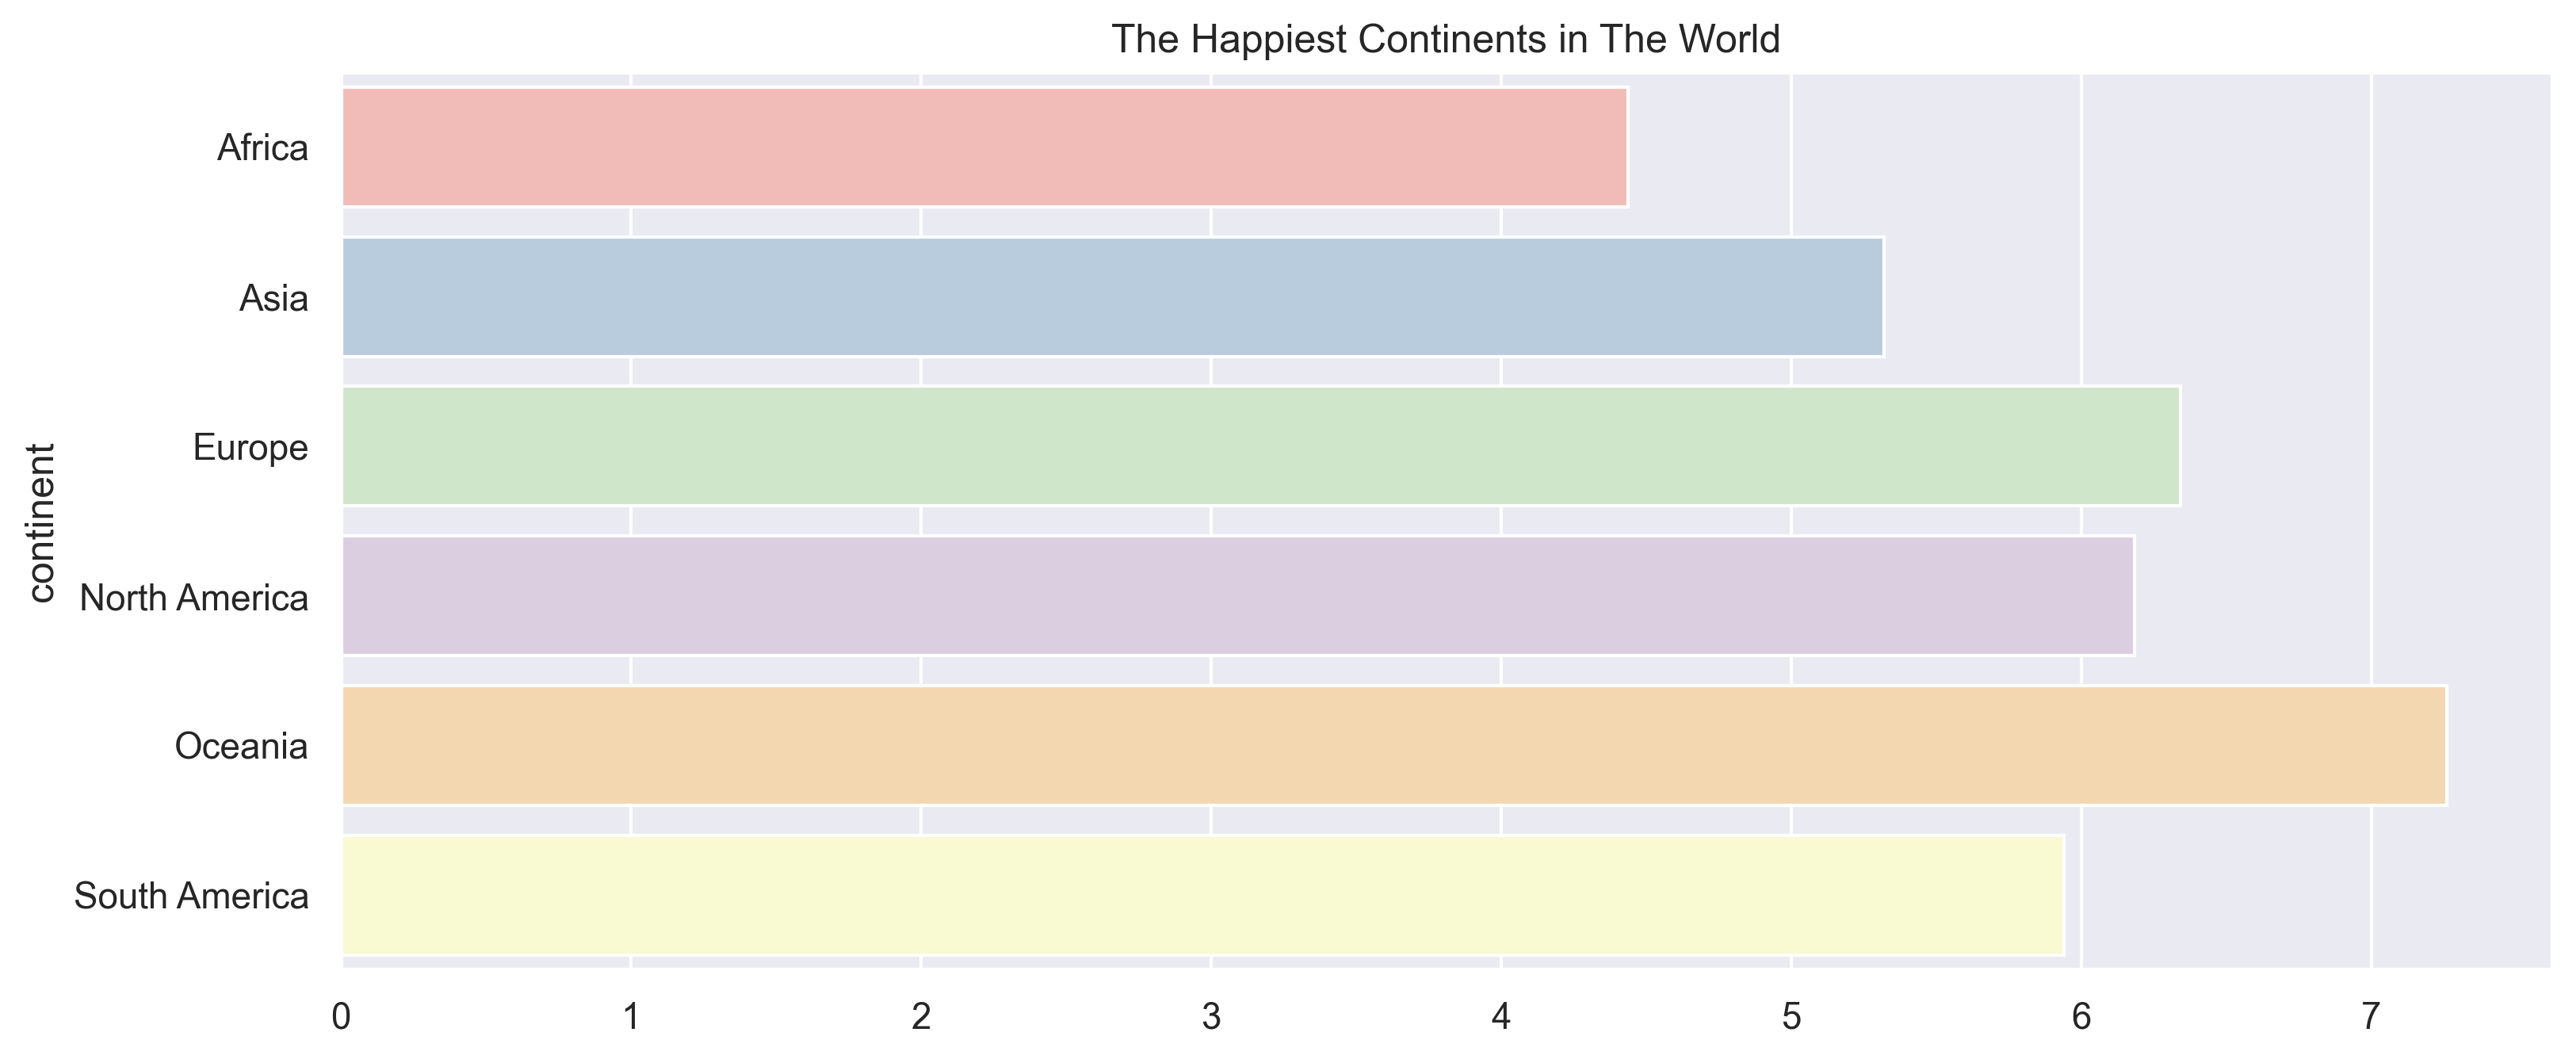

In [12]:
plt.figure(figsize=(12,5),dpi=300)

plt.title("The Happiest Continents in The World")

data=twenty_twenty_data.groupby('continent').ladder_score.sum()/twenty_twenty_data.groupby('continent').ladder_score.count()


#sns.barplot(data=twenty_twenty_data["continent"]., y="country",x="ladder_score")
sns.barplot(y=data.index,x=data.values,palette="Pastel1")


continent
Africa           34.745279
Asia             30.817079
Europe           28.046119
North America     9.781829
Oceania           0.636308
South America     8.140780
Name: perception_of_corruption, dtype: float64


<AxesSubplot:ylabel='continent'>

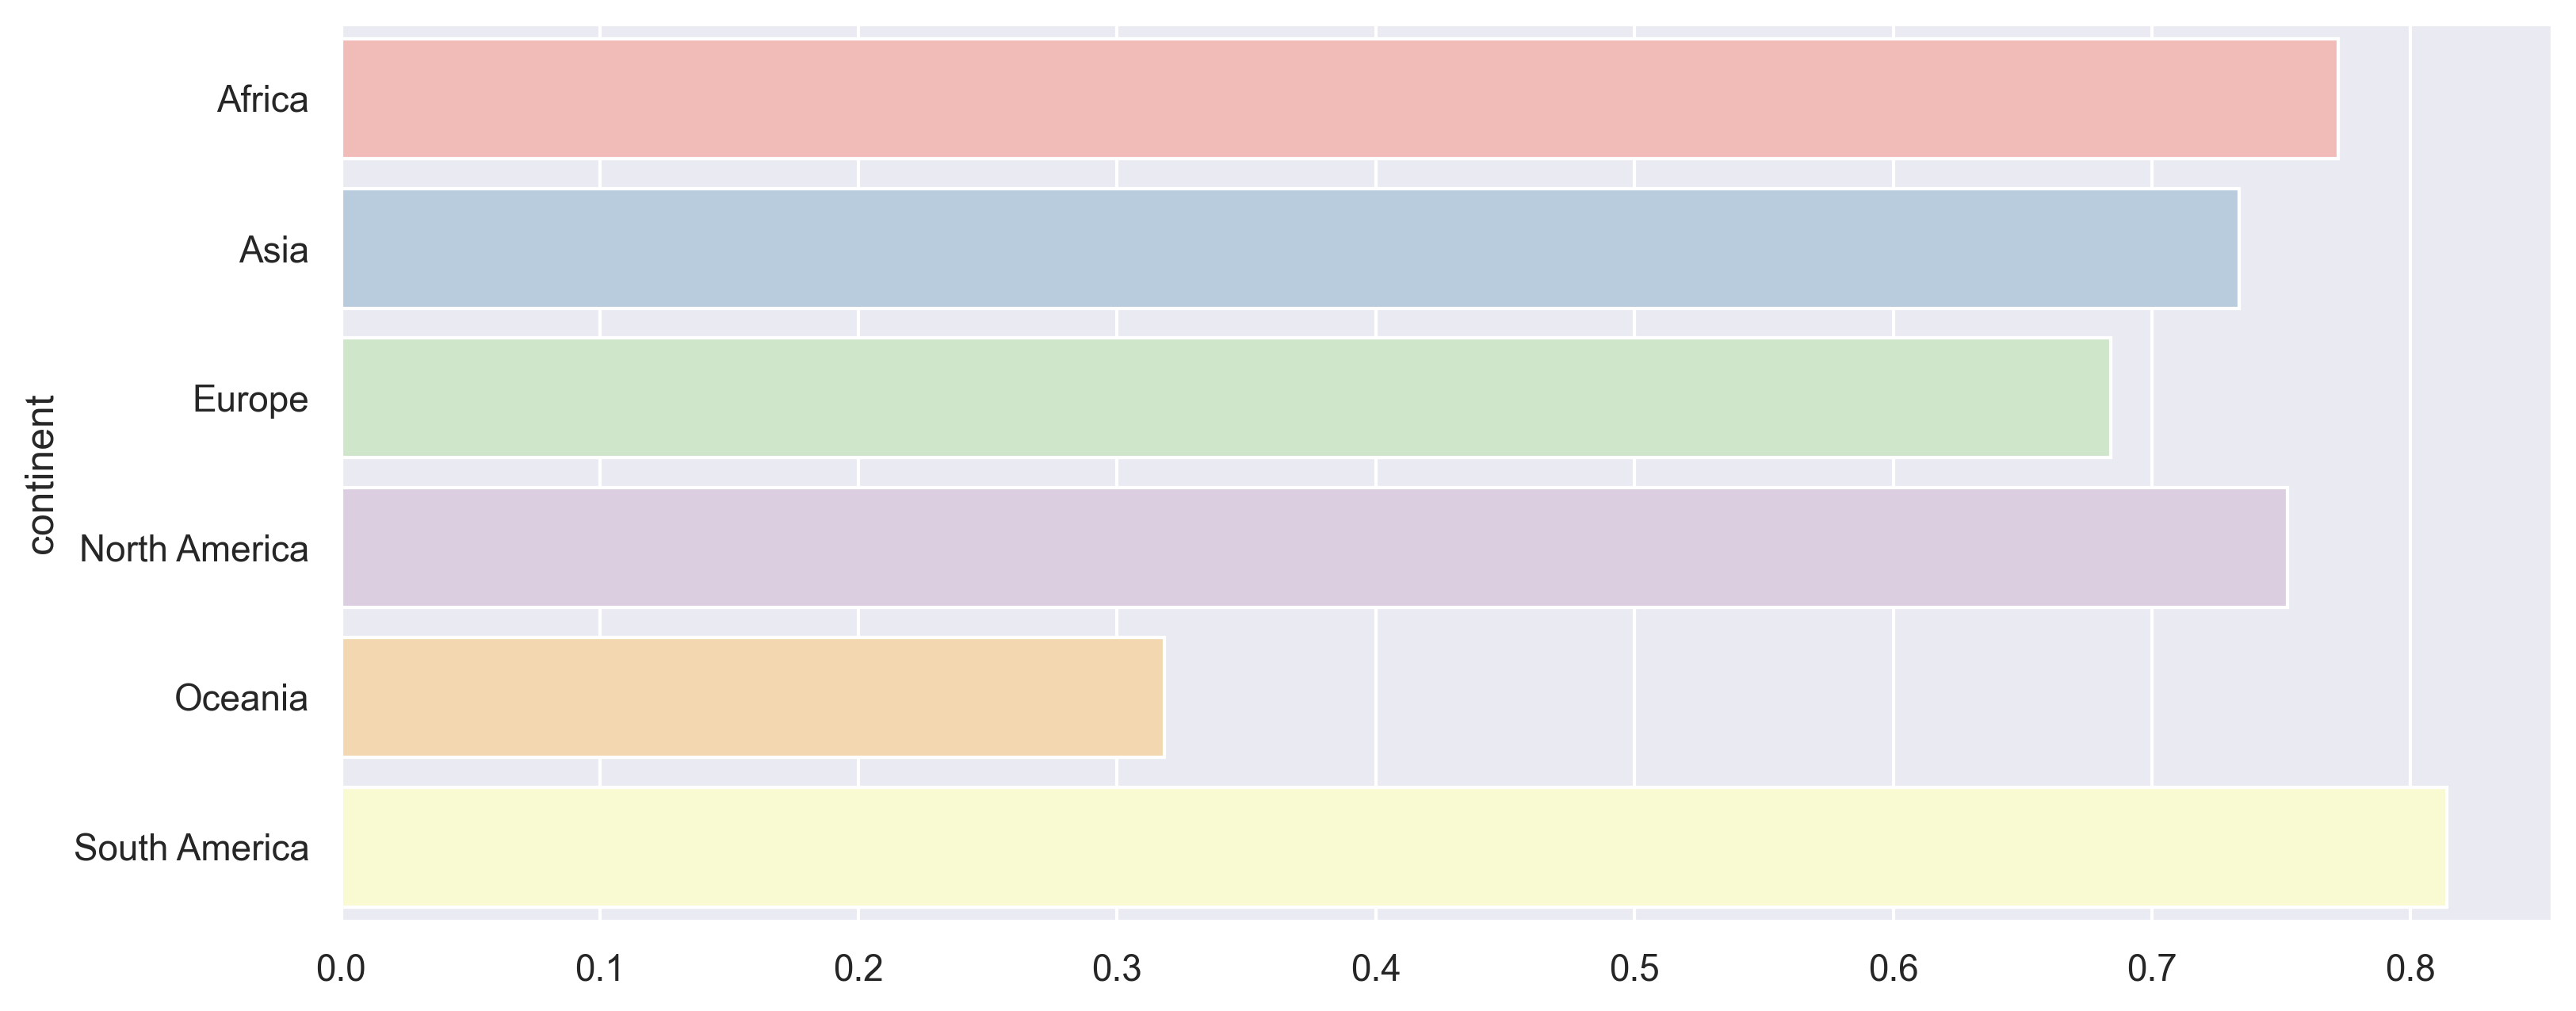

In [13]:
plt.figure(figsize=(12,5),dpi=300)

corruption_data=twenty_twenty_data.groupby('continent').perception_of_corruption.sum()/twenty_twenty_data.groupby('continent').perception_of_corruption.count()
sns.barplot(y=corruption_data.index,x=corruption_data.values,palette="Pastel1")
print(twenty_twenty_data.groupby('continent').perception_of_corruption.sum())
twenty_twenty_data.groupby('continent').perception_of_corruption.count()
sns.barplot(y=corruption_data.index,x=corruption_data.values,palette="Pastel1")

<Figure size 3600x1500 with 0 Axes>

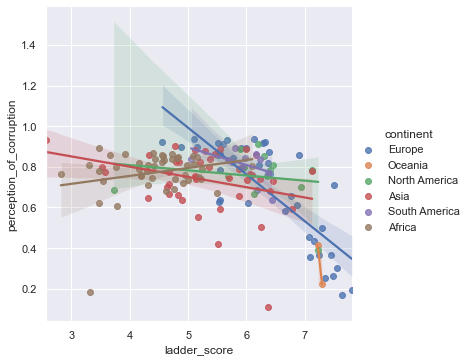

In [14]:
plt.figure(figsize=(12,5),dpi=300)
sns.lmplot(data=twenty_twenty_data,x="ladder_score",y="perception_of_corruption",hue="continent")
plt.savefig("fig.png", dpi=500)

<AxesSubplot:ylabel='continent'>

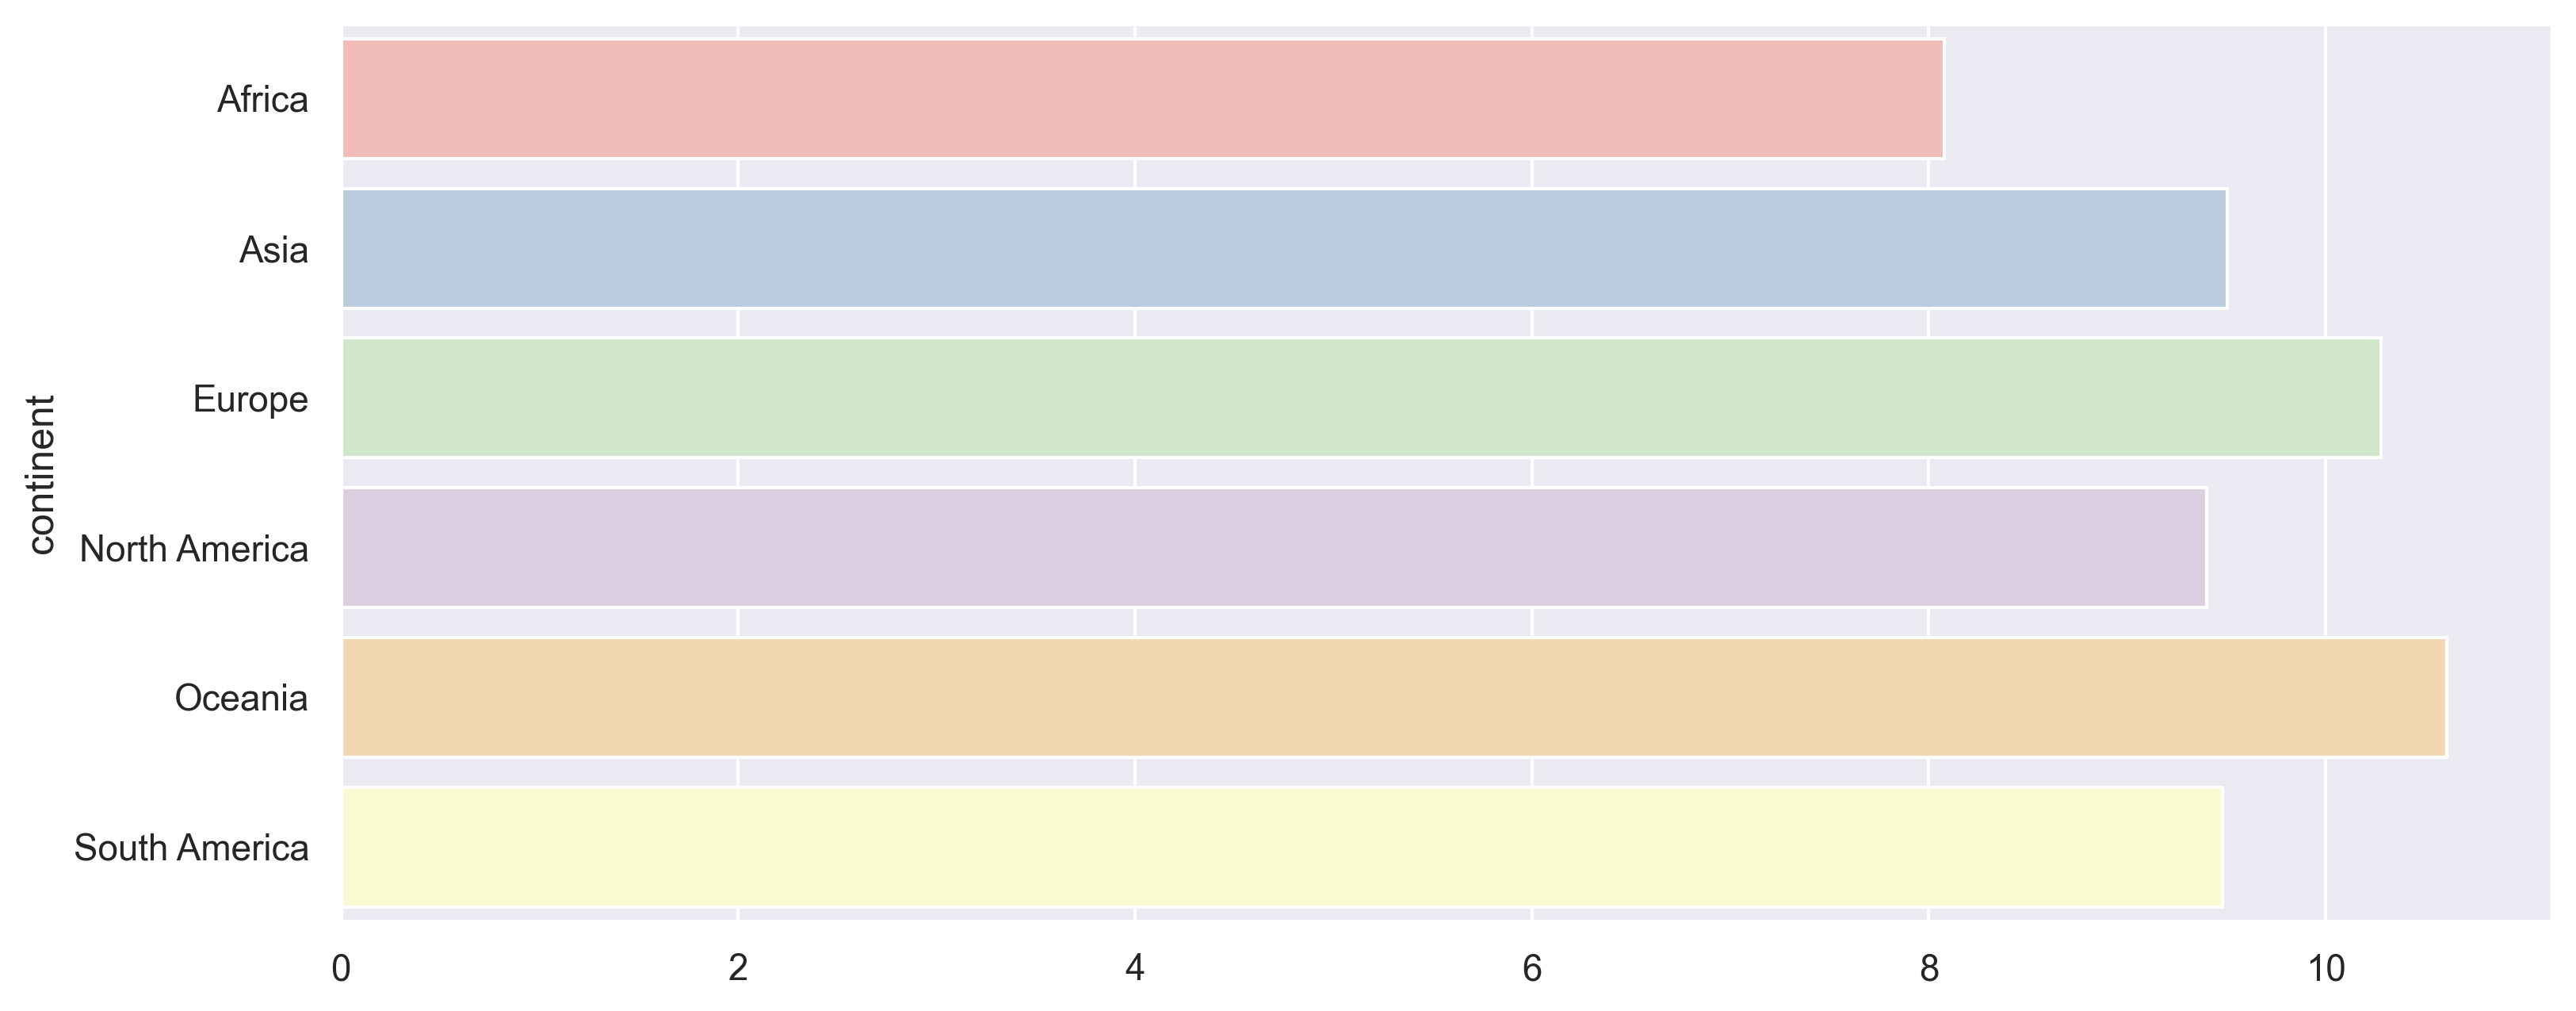

In [15]:
plt.figure(figsize=(12,5),dpi=300)

data=twenty_twenty_data.groupby('continent').GDP.sum()/twenty_twenty_data.groupby('continent').GDP.count()
sns.barplot(y=data.index,x=data.values,palette="Pastel1")


<Figure size 864x504 with 0 Axes>

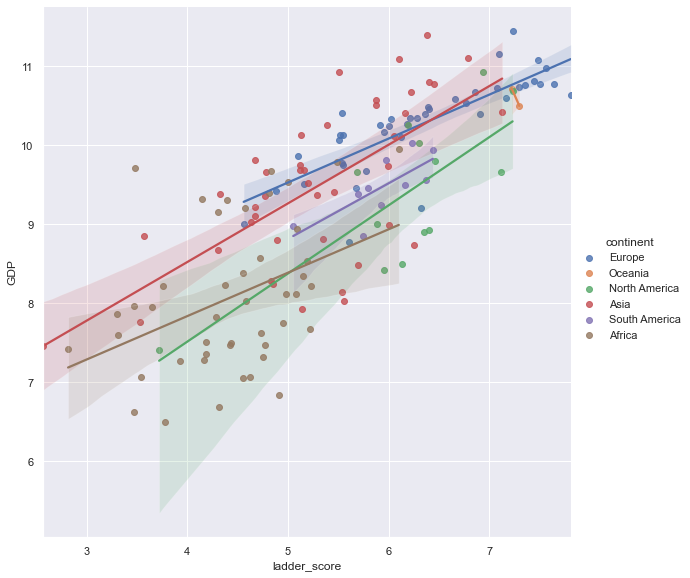

In [16]:
plt.figure(figsize=(12,7))
sns.lmplot(data=twenty_twenty_data,x="ladder_score",y="GDP",hue="continent", height=8)

<AxesSubplot:ylabel='continent'>

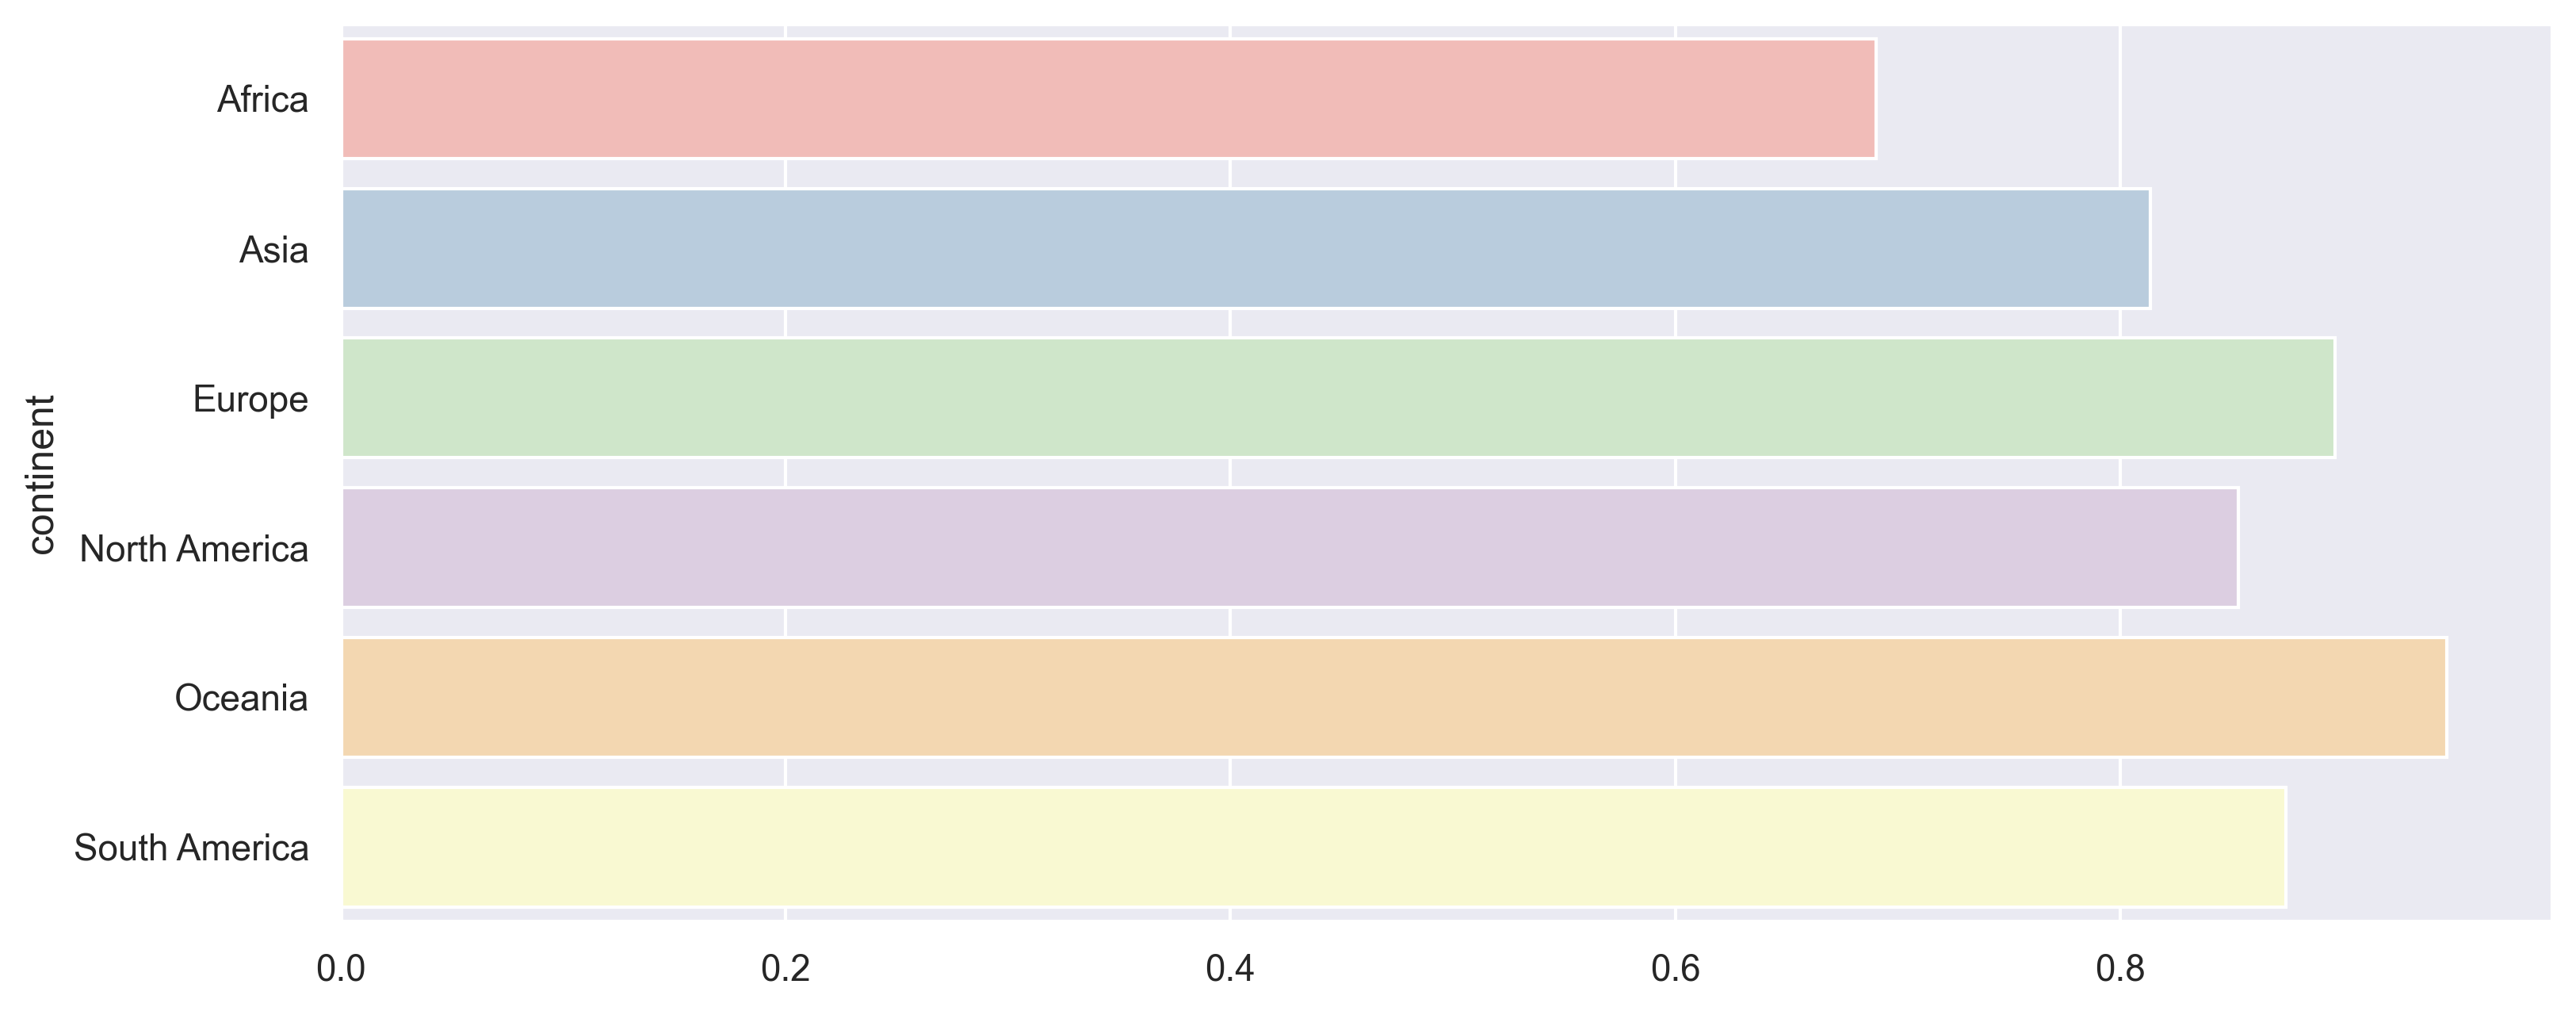

In [17]:
plt.figure(figsize=(12,5),dpi=300)


data=twenty_twenty_data.groupby('continent').social_support.sum()/twenty_twenty_data.groupby('continent').social_support.count()
sns.barplot(y=data.index,x=data.values,palette="Pastel1")



<Figure size 864x504 with 0 Axes>

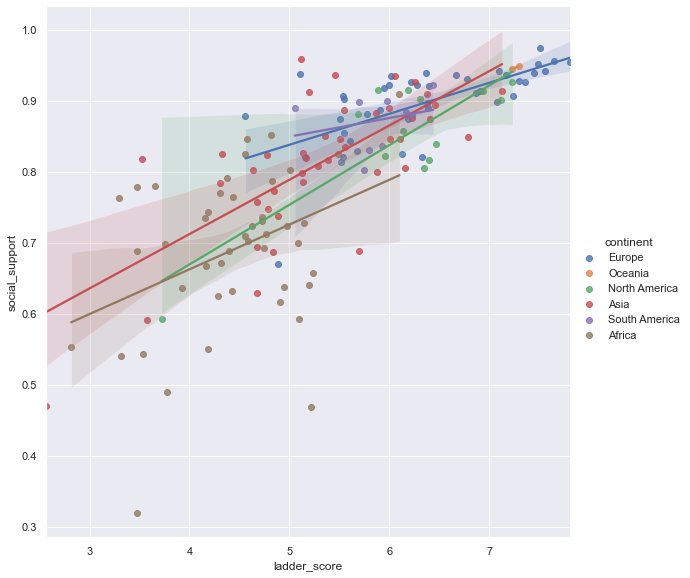

In [18]:
plt.figure(figsize=(12,7))
sns.lmplot(data=twenty_twenty_data,x="ladder_score",y="social_support",hue="continent", height=8)

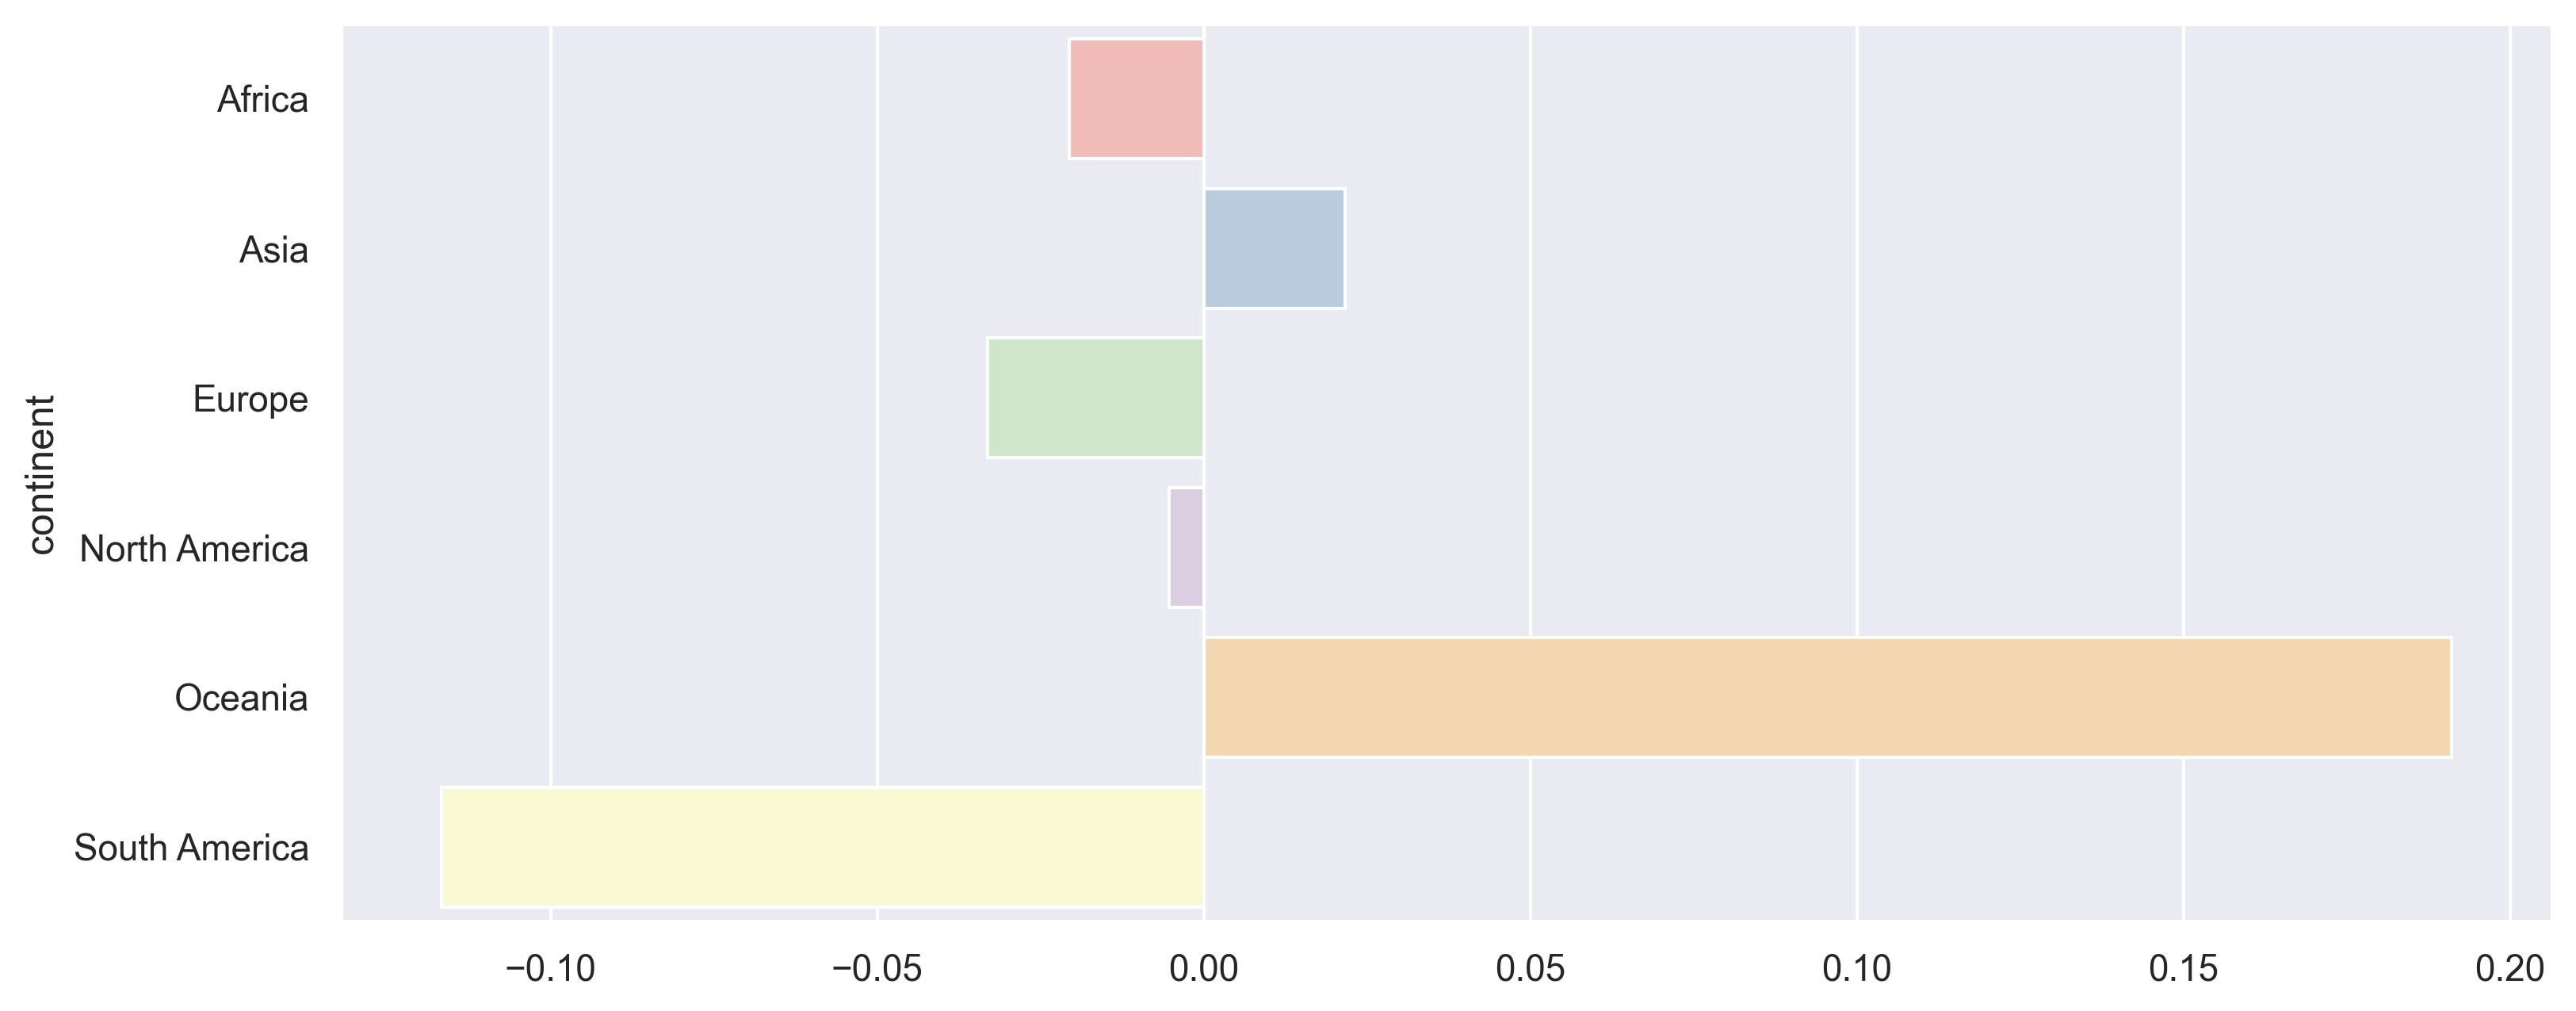

In [19]:
plt.figure(figsize=(12,5),dpi=300)


data=twenty_twenty_data.groupby('continent').Generosity.sum()/twenty_twenty_data.groupby('continent').Generosity.count()
sns.barplot(y=data.index,x=data.values,palette="Pastel1")

fig = px.bar(data,y=data.index,x=data.values,orientation="h")
fig.update_traces(marker_color=["#948C5F","#D19480","#CB4F34","#2B506B","#82BAA7","#7B92A6"])
fig.show()


<Figure size 864x504 with 0 Axes>

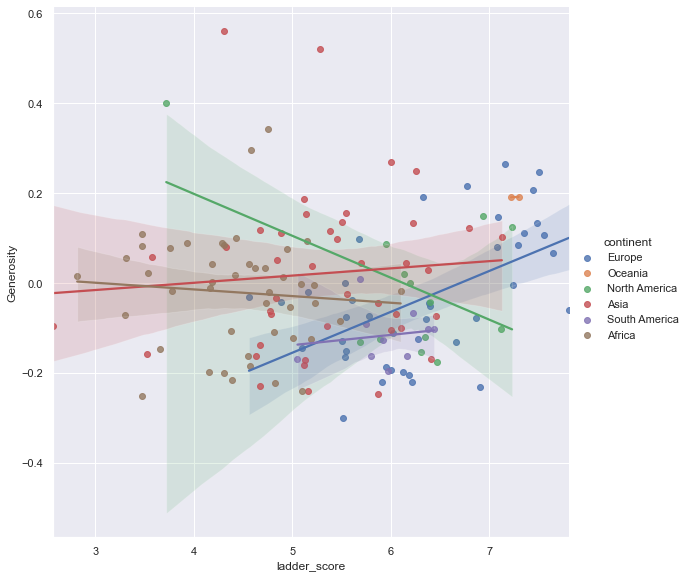

In [20]:
plt.figure(figsize=(12,7))
sns.lmplot(data=twenty_twenty_data,x="ladder_score",y="Generosity",hue="continent", height=8)

<AxesSubplot:ylabel='continent'>

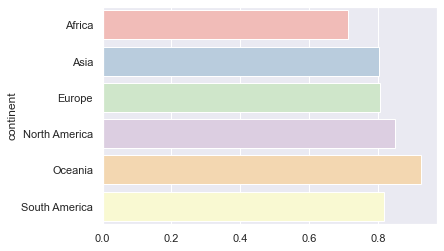

In [21]:

data=twenty_twenty_data.groupby('continent').freedom.sum()/twenty_twenty_data.groupby('continent').freedom.count()
sns.barplot(y=data.index,x=data.values,palette="Pastel1")

<Figure size 864x504 with 0 Axes>

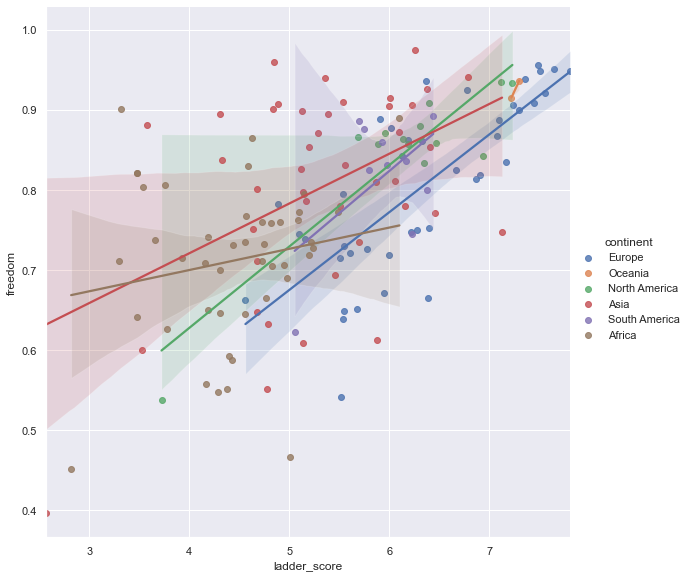

In [22]:
plt.figure(figsize=(12,7))
sns.lmplot(data=twenty_twenty_data,x="ladder_score",y="freedom",hue="continent", height=8)

In [23]:

fig = px.scatter(twenty_twenty_data, x="ladder_score",y="freedom",color="continent",trendline="ols")
fig.show()

<AxesSubplot:ylabel='continent'>

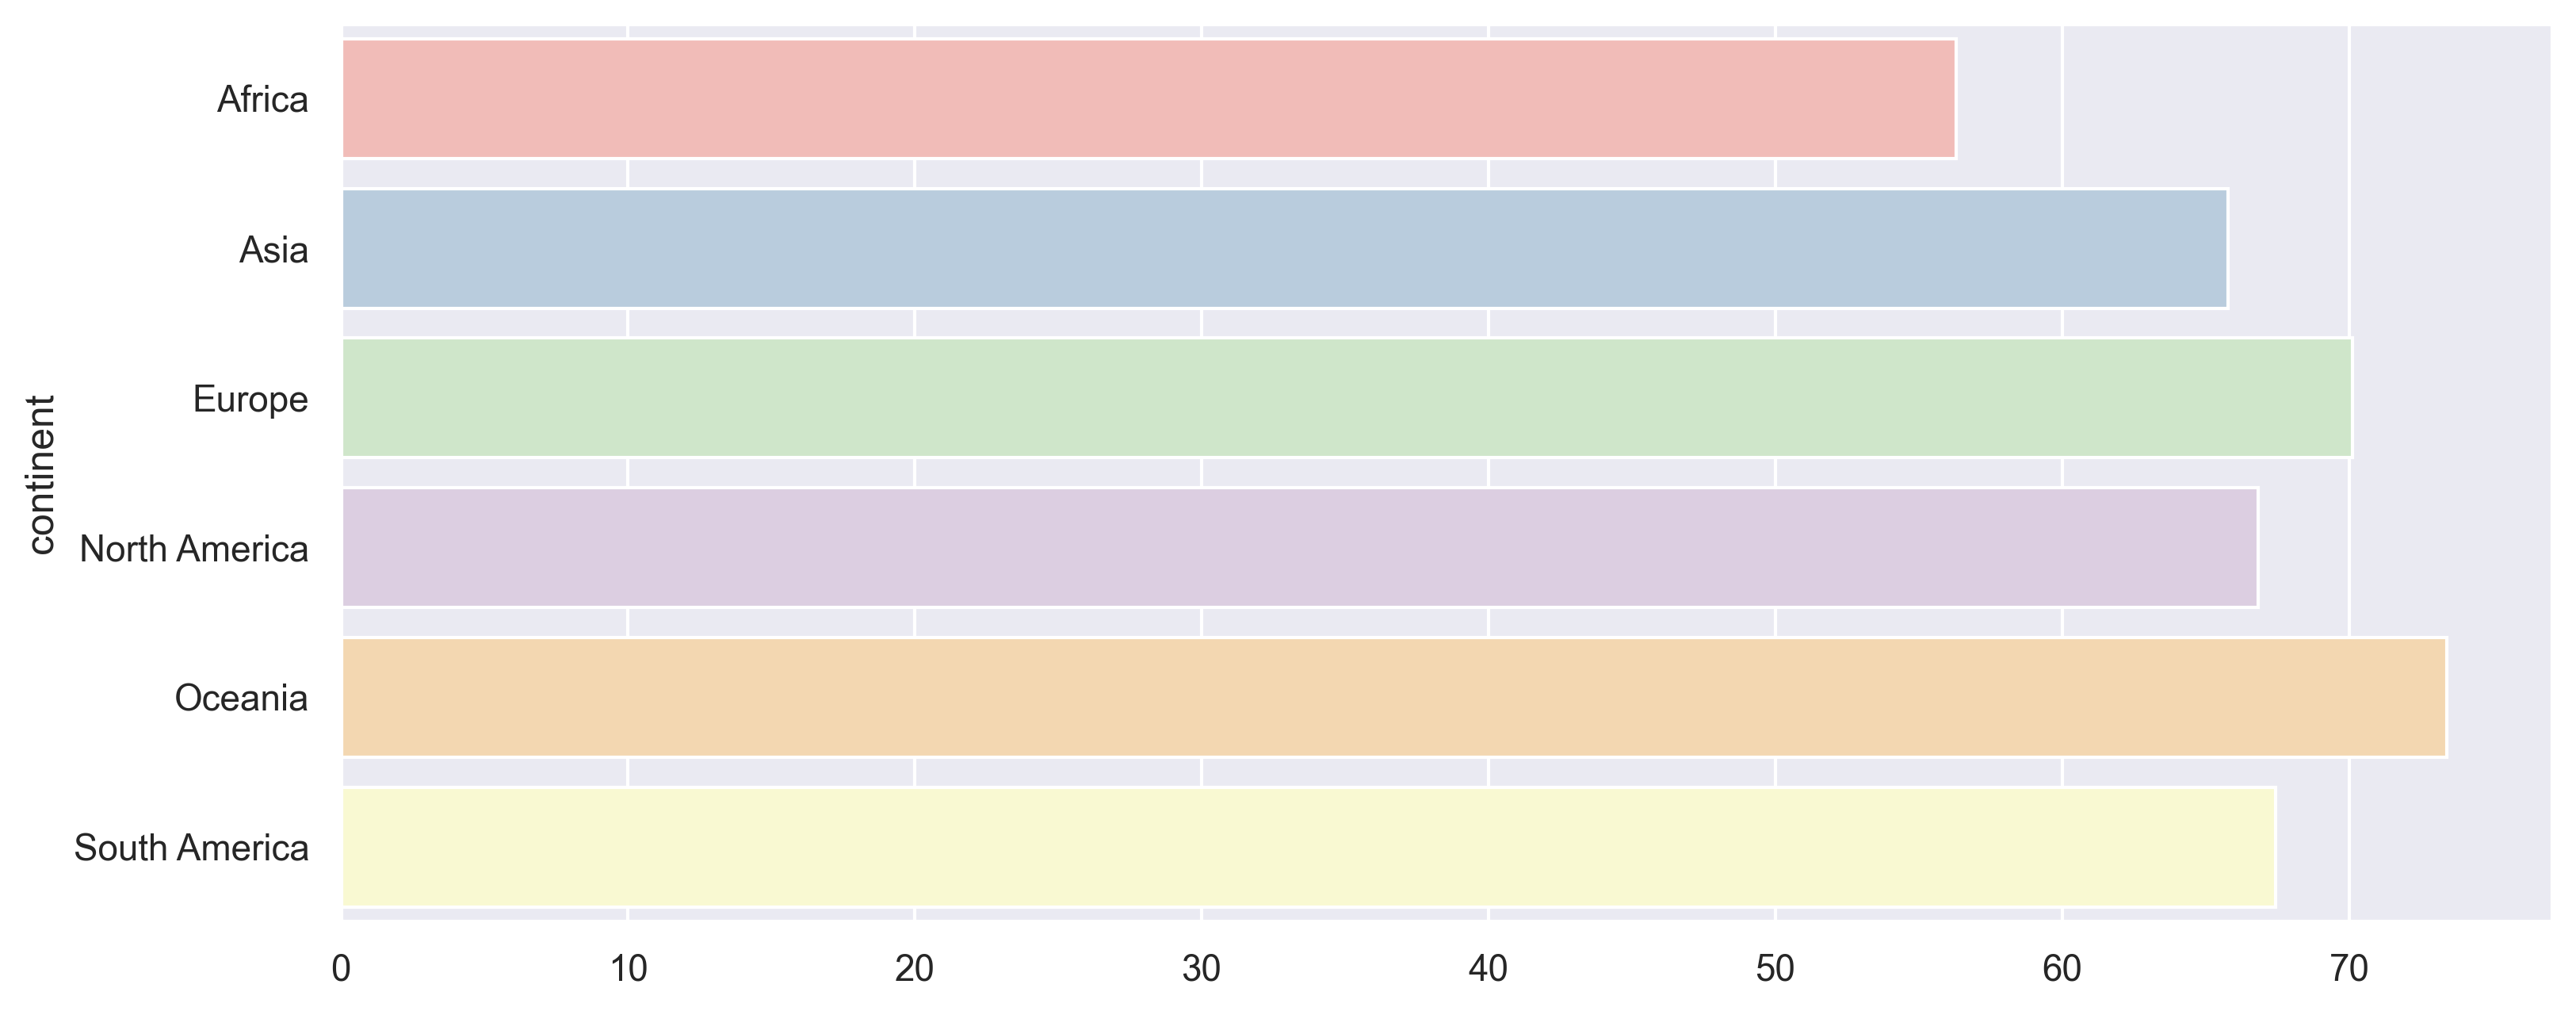

In [24]:

plt.figure(figsize=(12,5),dpi=300)
data=twenty_twenty_data.groupby('continent').healthy_life_expectancy.sum()/twenty_twenty_data.groupby('continent').healthy_life_expectancy.count()
sns.barplot(y=data.index,x=data.values,palette="Pastel1")



<Figure size 3600x2100 with 0 Axes>

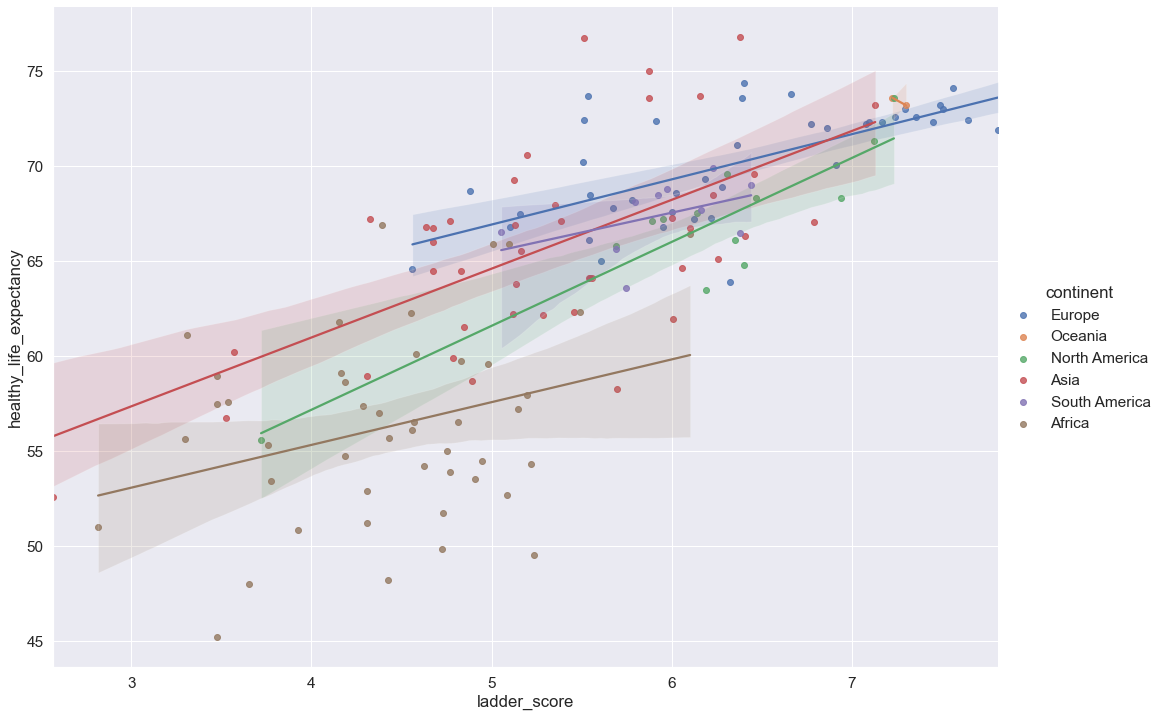

In [25]:
plt.figure(figsize=(12,7),dpi=300)
sns.set(font_scale=1.4)
sns.lmplot(data=twenty_twenty_data,x="ladder_score",y="healthy_life_expectancy",hue="continent", height=10,aspect=14/10)

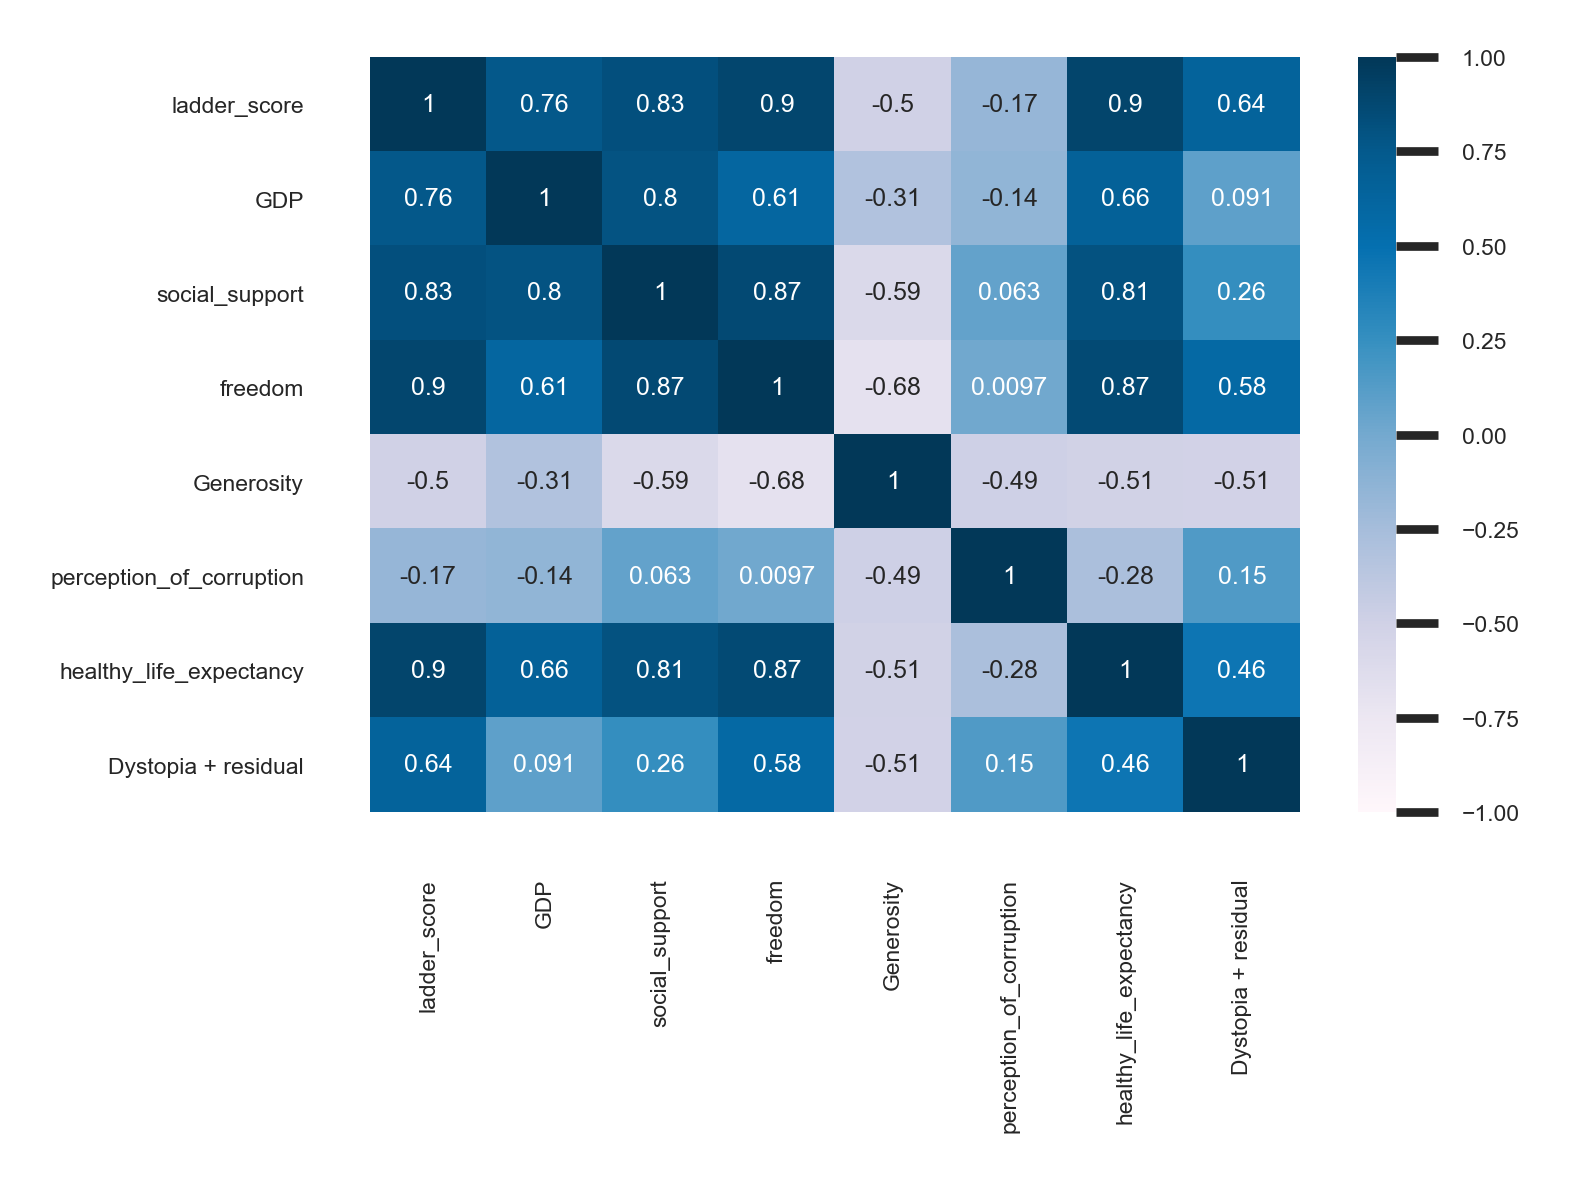

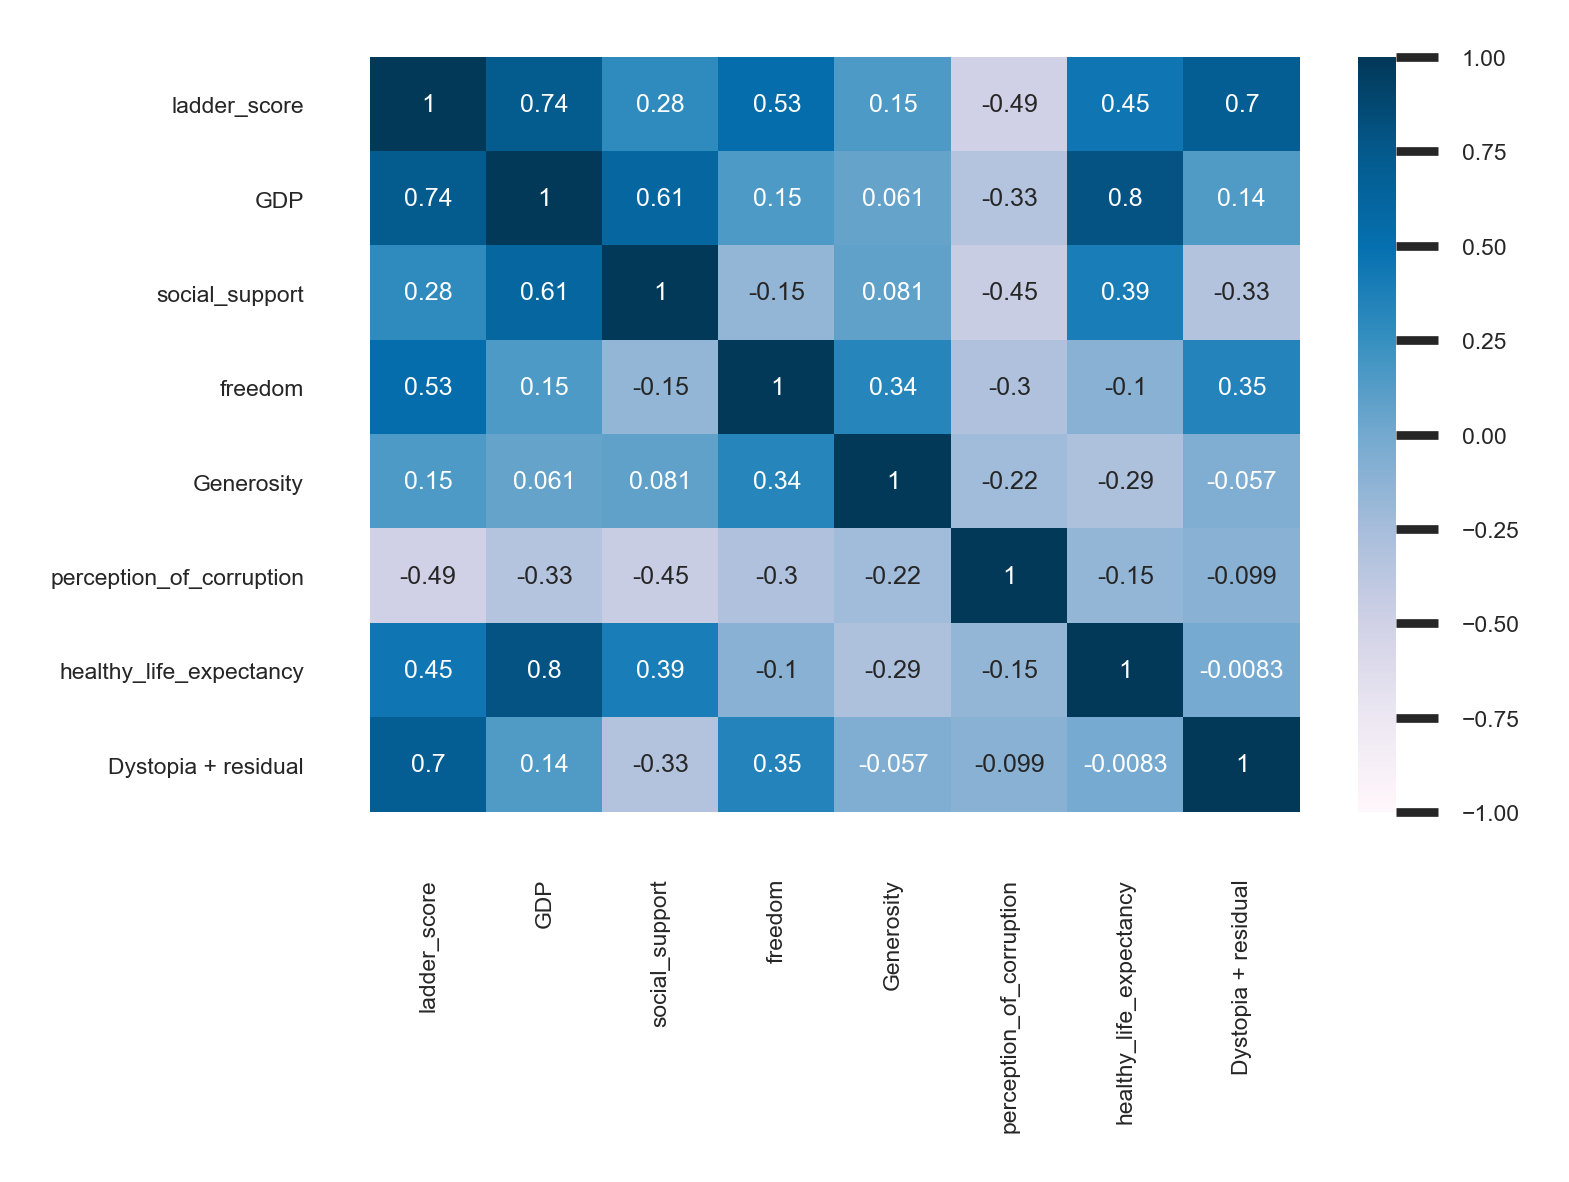

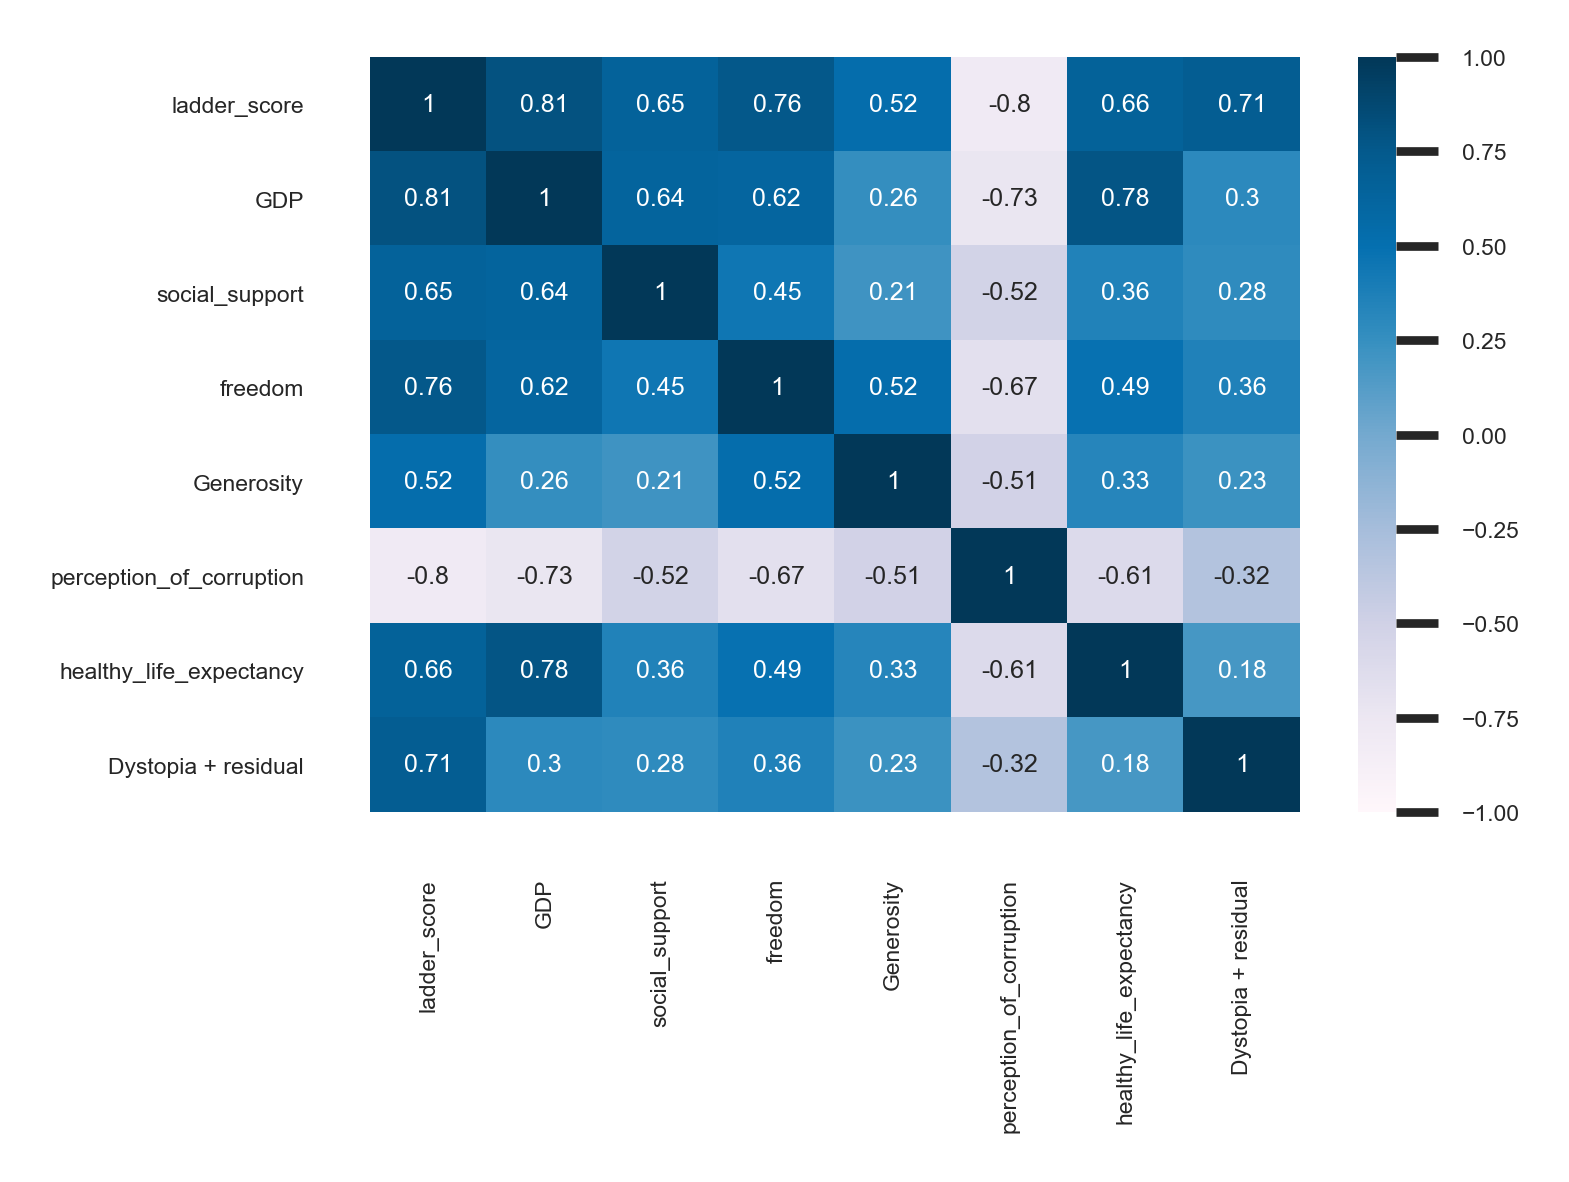

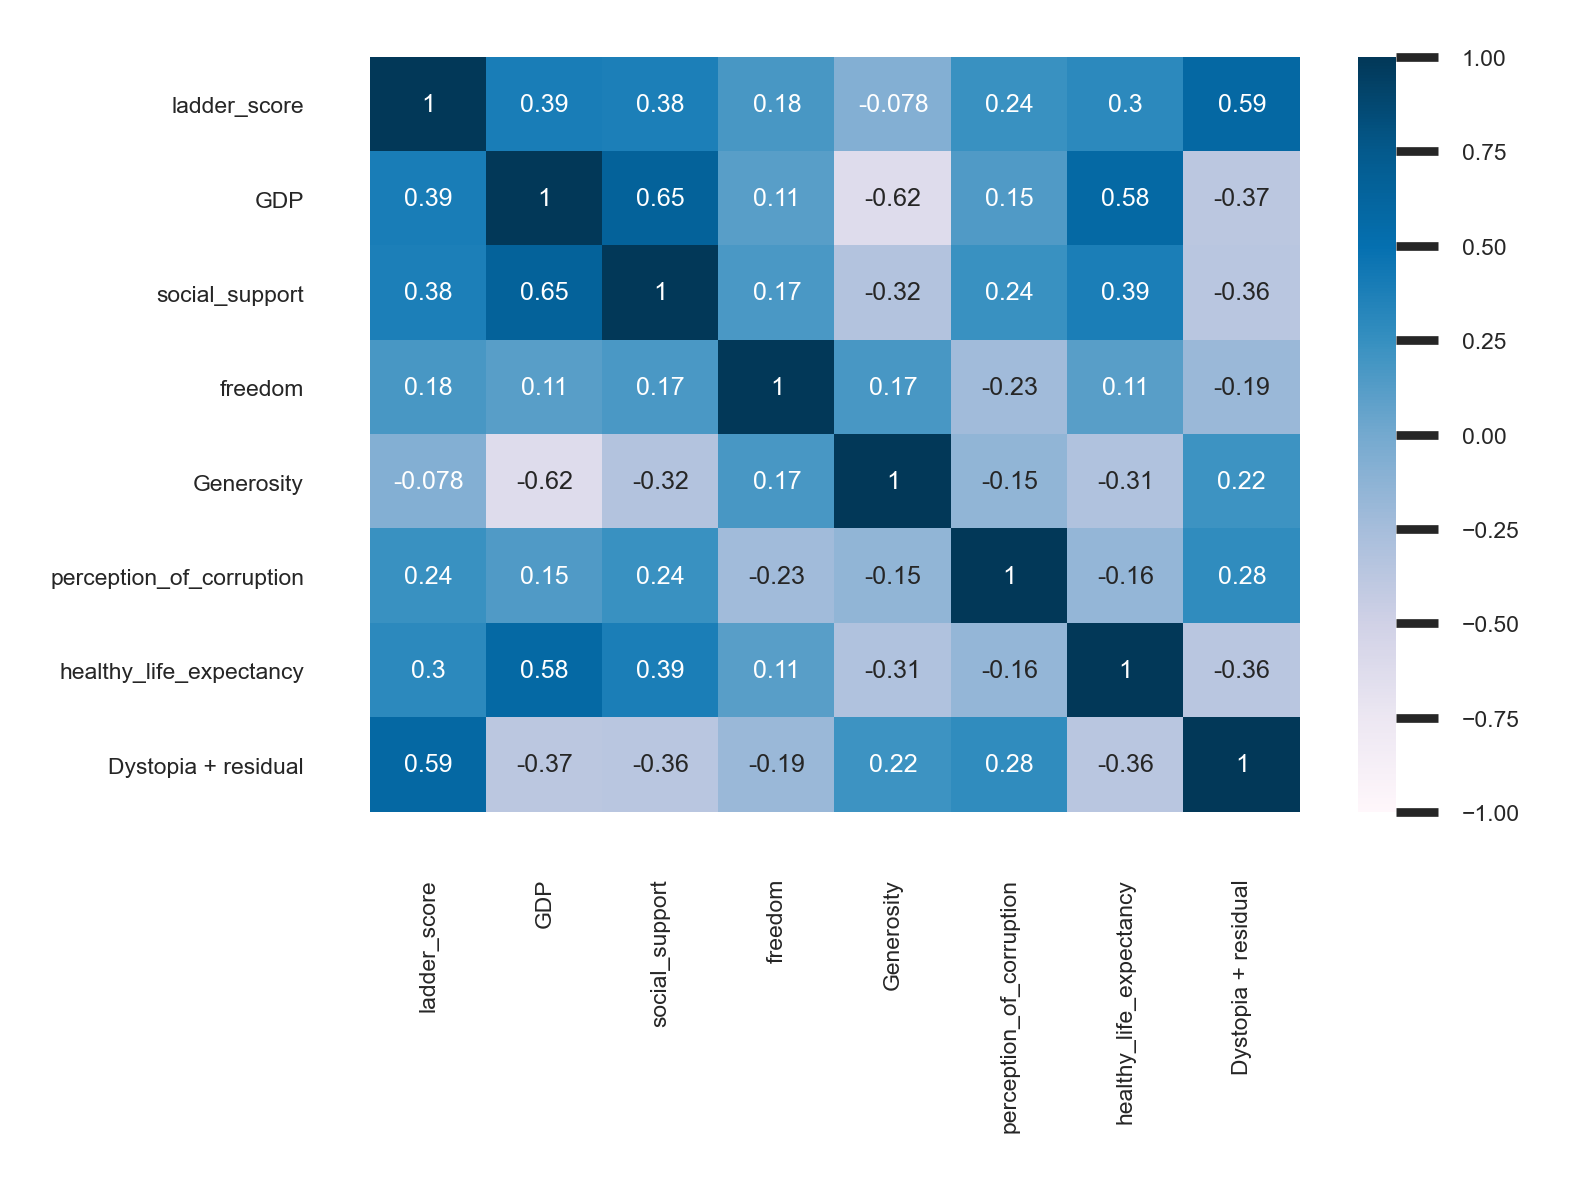

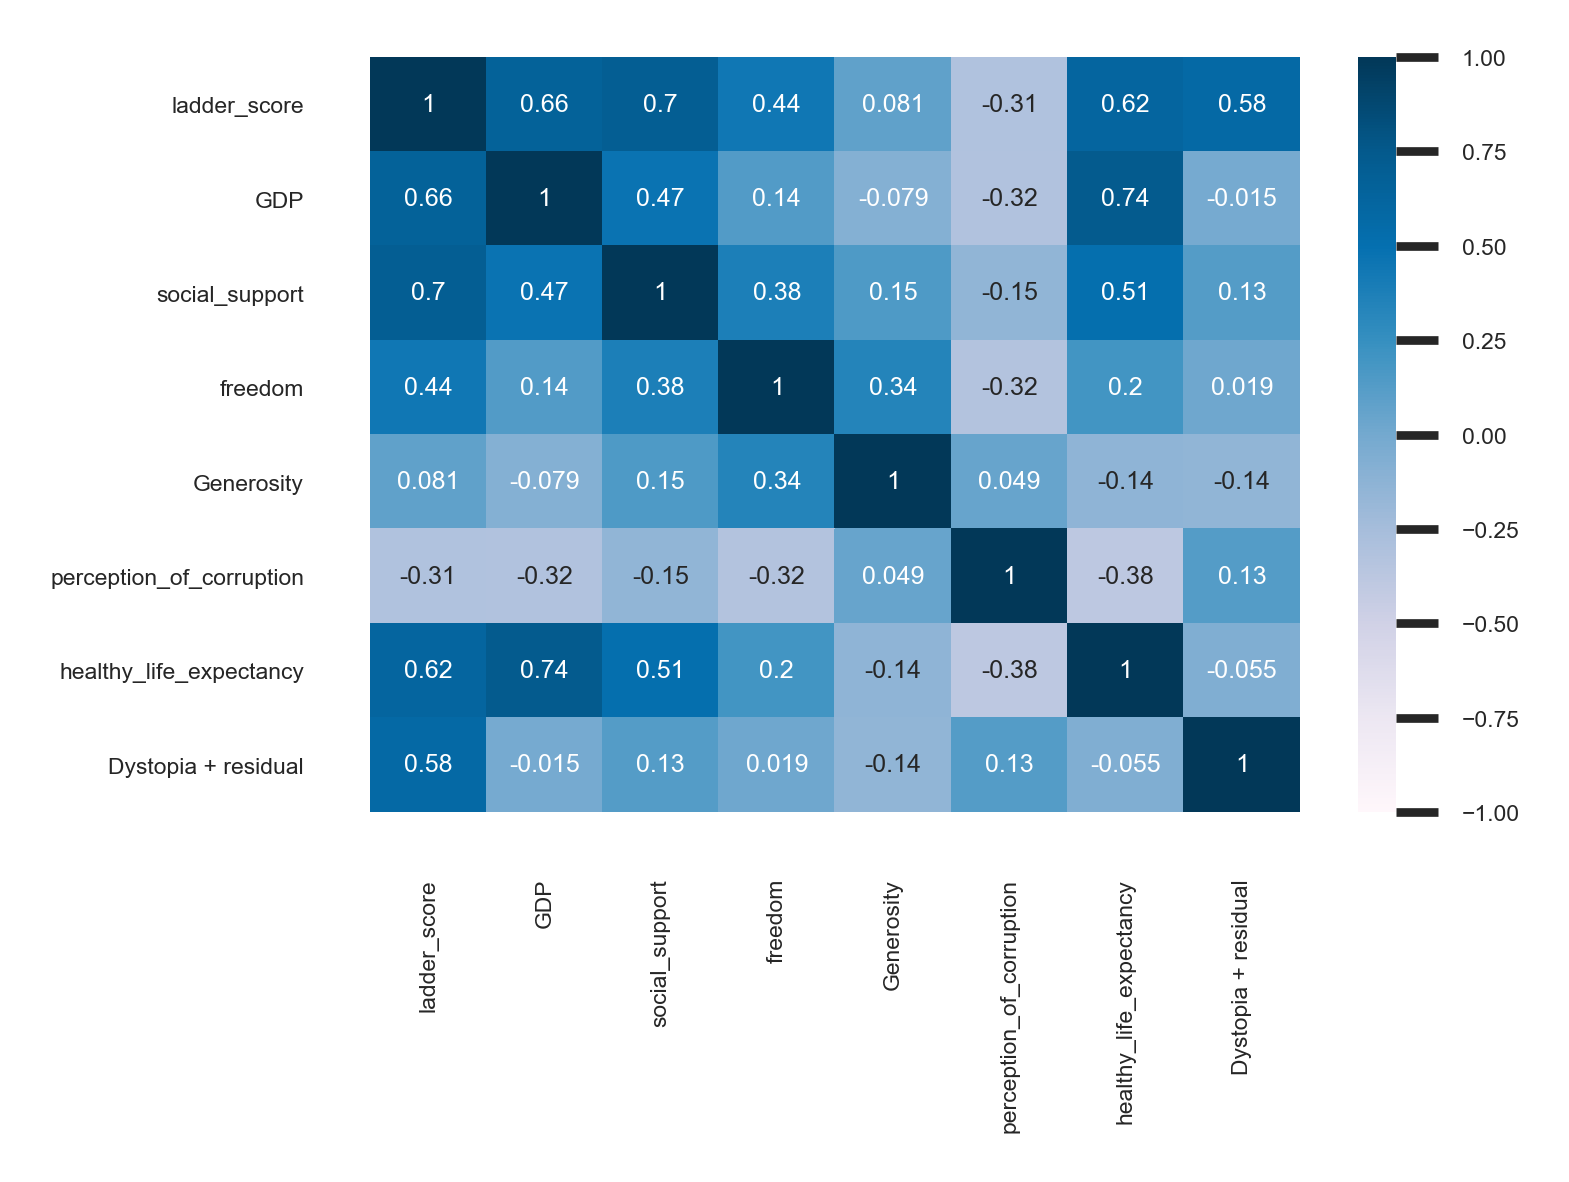

In [26]:
for i in["North America","South America","Europe","Africa","Asia"]:
    twenty_twenty_relevant_data = twenty_twenty_data.loc[twenty_twenty_data.continent==i].loc[:,["ladder_score","GDP","social_support","freedom","Generosity","perception_of_corruption","healthy_life_expectancy","Dystopia + residual"]].copy()
    sns.set(font_scale=0.3)
    ax = plt.subplots(figsize=(3,2),dpi=500) 
    sns.heatmap(twenty_twenty_relevant_data.corr(),vmin=-1, vmax=1, annot=True,cmap='PuBu')
    
    fig = go.Figure(data=go.Choropleth(
    locations = twenty_twenty_data.loc[twenty_twenty_data.continent==i]['code'],
    z = twenty_twenty_data.loc[twenty_twenty_data.continent==i]['ladder_score'],
    text = twenty_twenty_data.loc[twenty_twenty_data.continent==i]['country'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'World Happiness Score',
    ))

    fig.update_layout(
        title_text='2020 World Happiness',
        geo=dict(
            scope=i.lower(),
            showframe=False,
            showcoastlines=False,
            projection_type='equirectangular'
        ),
    )

    fig.show()
    #twenty_twenty_data.loc[twenty_twenty_data_gpd.continent==i].plot('ladder_score', cmap='Greens', linewidth=0.8, ax=ax,legend=True)

In [27]:

twenty_twenty_data[:].sum()

country                                       FinlandDenmarkSwitzerlandIcelandNorwayNetherla...
regional_indicator                            Western EuropeWestern EuropeWestern EuropeWest...
ladder_score                                                                            837.406
Standard error of ladder score                                                          8.19138
upperwhisker                                                                            853.461
lowerwhisker                                                                            821.351
GDP                                                                                     1422.24
social_support                                                                          123.734
healthy_life_expectancy                                                                 9860.17
freedom                                                                                 119.854
Generosity                              

<AxesSubplot:>

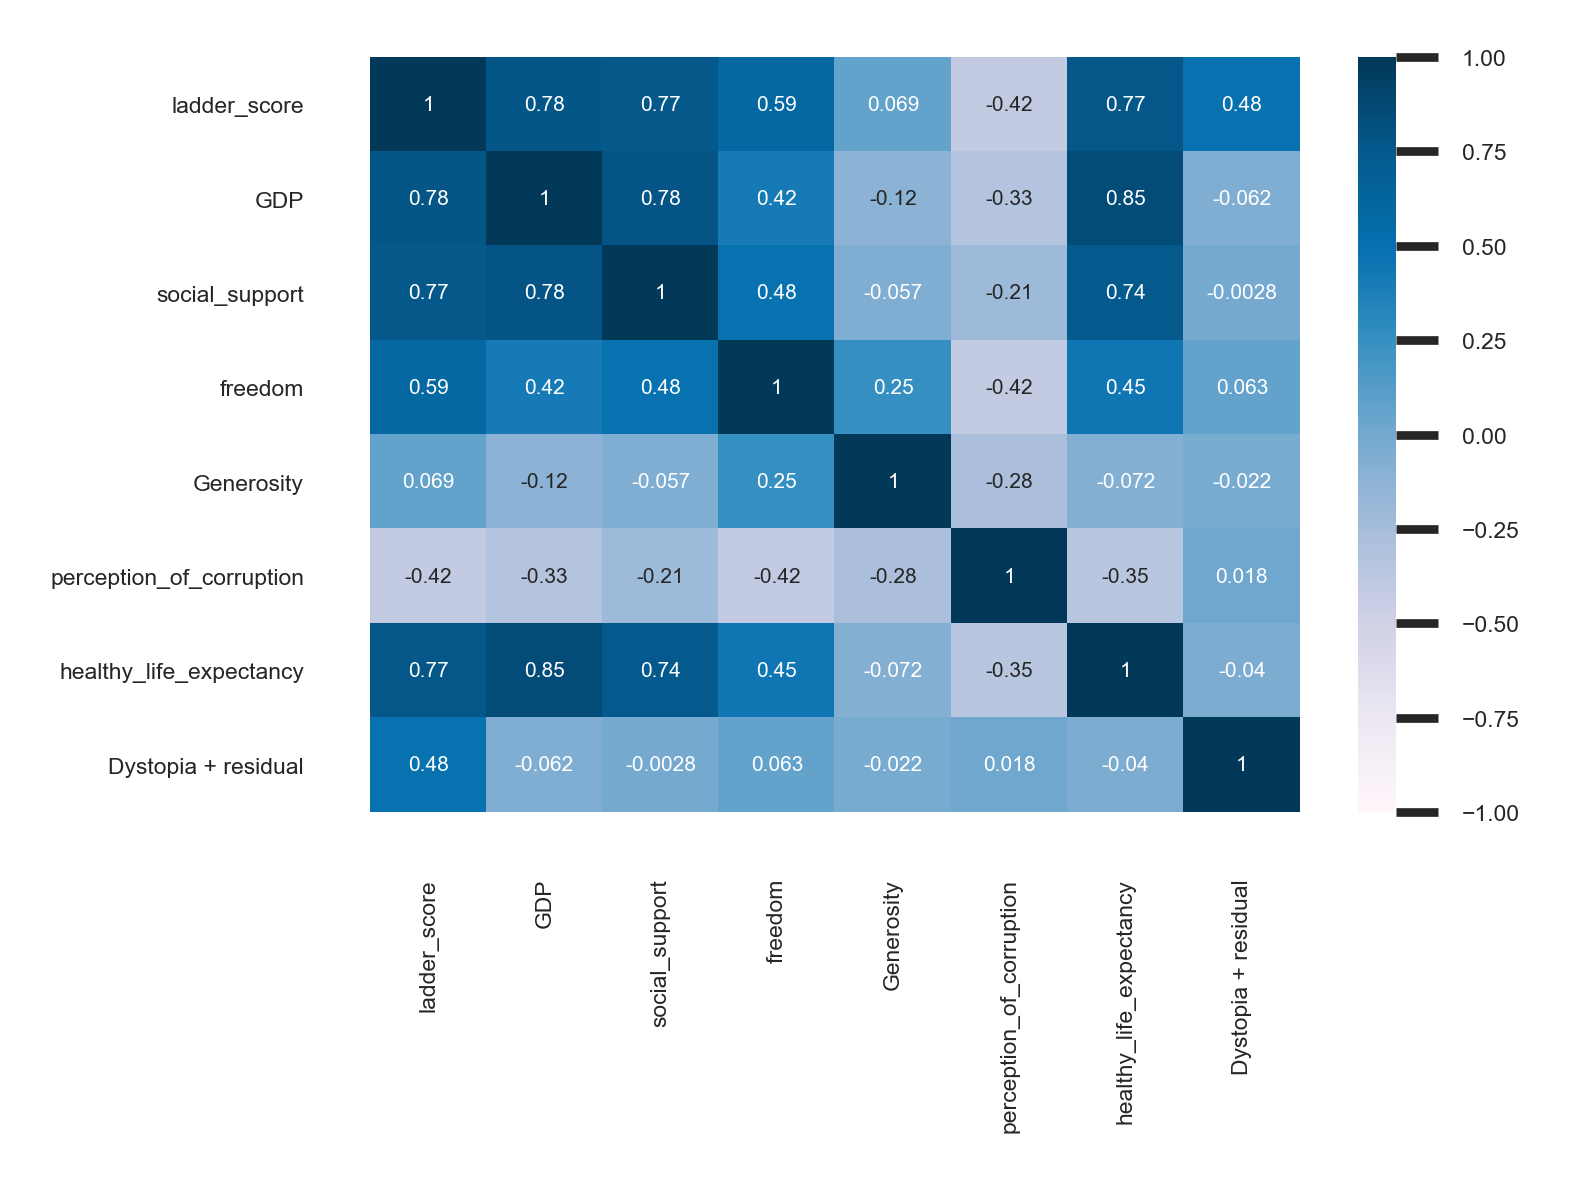

In [28]:
#plt.title("Happiness Score By Factor")
sns.set(font_scale=0.3)
fig, ax = plt.subplots(figsize=(3,2),dpi=500)
twenty_twenty_relevant_data = twenty_twenty_data.loc[:,["ladder_score","GDP","social_support","freedom","Generosity","perception_of_corruption","healthy_life_expectancy","Dystopia + residual"]].copy()
#twenty_twenty_relevant_data= twenty_twenty_relevant_data.set_index("ladder_score")
#sns.heatmap(data=twenty_twenty_relevant_data)
corr = twenty_twenty_relevant_data.corr()
sns.heatmap(corr,vmin=-1, vmax=1, annot=True,cmap='PuBu',label='small',annot_kws={"size": 3})

In [29]:
twenty_twenty_relevant_data = twenty_twenty_data.loc[twenty_twenty_data.continent=="Oceania"].loc[:,["ladder_score","GDP","social_support","freedom","Generosity","perception_of_corruption","healthy_life_expectancy","Dystopia + residual"]].copy()
twenty_twenty_relevant_data.corr()

ladder_score  GDP  social_support  freedom  \
ladder_score                       1.0 -1.0             1.0      1.0   
GDP                               -1.0  1.0            -1.0     -1.0   
social_support                     1.0 -1.0             1.0      1.0   
freedom                            1.0 -1.0             1.0      1.0   
Generosity                         1.0 -1.0             1.0      1.0   
perception_of_corruption          -1.0  1.0            -1.0     -1.0   
healthy_life_expectancy           -1.0  1.0            -1.0     -1.0   
Dystopia + residual               -1.0  1.0            -1.0     -1.0   

                          Generosity  perception_of_corruption  \
ladder_score                     1.0                      -1.0   
GDP                             -1.0                       1.0   
social_support                   1.0                      -1.0   
freedom                          1.0                      -1.0   
Generosity                       1.0                      -1.0   
perception_of_corruption        -1.0                       1.0   
healthy_life_expectancy         -1.0                       1.0   
Dystopia + residual             -1.0                       1.0   

                          healthy_life_expectancy  Dystopia + residual  
ladder_score                                 -1.0                 -1.0  
GDP                                           1.0                  1.0  
social_support                               -1.0                 -1.0  
freedom                                      -1.0                 -1.0  
Generosity                                   -1.0                 -1.0  
perception_of_corruption                      1.0                  1.0  
healthy_life_expectancy                       1.0                  1.0  
Dystopia + residual                           1.0                  1.0

In [30]:
twenty_twenty_data.groupby('continent').ladder_score.count()

continent
Africa           45
Asia             42
Europe           41
North America    13
Oceania           2
South America    10
Name: ladder_score, dtype: int64